# FatemehVahabi-4013614052-MLHW4-Q1,Q2

from torchvision import transforms
import numpy
import torch.nn as nn
import torch.nn.functional as F
import torch
from torchtext.datasets import IMDB
import matplotlib.pyplot as plt 
from torchvision import datasets
from sklearn.metrics import accuracy_score


In [1]:
import matplotlib.pyplot as plt

def draw_result(x_values,y_values):
    plt.bar( y_values,x_values)
    
    fig = plt.gcf() # gcf stands for "get current figure"
    fig.set_size_inches(15, 10) # Set the size of the figure to 8 inches by 6 inches
    # display plot
    plt.show()

در این قطعه کد ما نمودار بار پلات را رسم میکنیم.

# Q1

In [2]:
from keras.datasets import mnist 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data () 

در این قطعه کد ما مجموعه داده را لود میکنیم.

In [3]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype ('float32')/255
#----
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype ('float32')/255
#----
from keras.utils import to_categorical 
train_labels = to_categorical (train_labels) 
test_labels = to_categorical (test_labels)
#----

This code is preparing image and label data for training a deep learning model using the Keras library.

The first line reshapes the training images from their original 28x28 pixel dimensions to a flattened array of length 784 (28*28).

The second line converts the pixel values of the training images to floating-point numbers between 0 and 1 by dividing each value by 255, which is the maximum pixel value possible.

The next two lines repeat this process for the test images.

The final three lines convert the class labels for the training and test sets into one-hot encoded vectors using the to_categorical function from Keras utils. This means that instead of being represented as integers (e.g., 0 for "T-shirt/top", 1 for "Trouser", etc.), each label is now represented as a vector with a 1 in the position corresponding to its true class and zeros elsewhere. For example, if the true label for an image is "Pullover", the corresponding one-hot encoded vector would be [0,0,0,0,0,0,1,0,0,0]. This format is commonly used for multi-class classification tasks in deep learning.

## a)

In [4]:
x=[]
y=['1 layer','2 layer','3 layer']

This code is defining a neural network model using the Keras library, compiling it with appropriate optimizer and loss functions, and training and evaluating it on MNIST dataset.

The first line imports the models module from Keras, which provides high-level APIs for building and training neural networks. Similarly, the second line imports the layers module, which contains various neural network layers that can be used to build custom models.

The third line creates a new sequential model object network using the Sequential() constructor, which allows us to stack multiple layers together sequentially in our model.

The fourth line adds a dense (fully connected) layer with 10 output units and a softmax activation function to the model using the add() method of the Sequential object. The input shape to this layer is (28*28,), indicating that each input sample is a flattened array of length 784 pixels.

The fifth line compiles the model by specifying the optimizer, loss function, and metrics to use during training. Here, we're using rmsprop optimizer, categorical_crossentropy loss function and tracking accuracy as a metric.

The sixth line trains the model on the training images and labels data (train_images and train_labels) for 5 epochs (passes over the entire training set), using a batch size of 128. During training, the model updates its weights and biases based on the gradients computed using backpropagation algorithm.

The seventh line evaluates the trained model on the test images and labels data (test_images and test_labels) and calculates the test loss and accuracy using the evaluate() method of the Sequential object.

Finally, the last three lines print the test accuracy and append it to a list x.

In [5]:
from keras import models 
from keras import layers 
network = models.Sequential()
#----
#network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax',input_shape=(28*28,)))

#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
history=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('test_acc:' , test_acc)
x.append(test_acc)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5982 - accuracy: 0.8528
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3330 - accuracy: 0.9078
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3040 - accuracy: 0.9157
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2906 - accuracy: 0.9187
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2752 - accuracy: 0.9228
test_acc: 0.9228000044822693


در این کد میبینیم که معیار صحت با فرض داشتن یک لایه با تعداد نورون 10 و تابع فعال ساز سافتمکس، به 92 درصد می رسد. و همچنین میزان لاس را میبنیم که از 0.6 به 0.28 رسیده است و در طی 5 اپوک به بهبود خوبی رسیده است.

In [6]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(512, activation='relu' ,input_shape = (28*28,))) 
network.add(layers.Dense(10, activation='softmax')) 
#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
history1=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('test_acc:', test_acc)
x.append(test_acc)

Epoch 1/5
469/469 [==============================] - 5s 8ms/step - loss: 0.2673 - accuracy: 0.9230
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1076 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0708 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0518 - accuracy: 0.9847
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0639 - accuracy: 0.9800
test_acc: 0.9800000190734863


در این کد میبینیم که معیار صحت با فرض داشتن دو لایه با تعداد نورون 10 و 512 و تابع فعال ساز سافتمکس و ریلو، به 97 درصد می رسد. و همچنین میزان لاس را میبنیم که از 0.26 به 0.03 رسیده است و در طی 5 اپوک به بهبود خوبی رسیده است.

In [7]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(512, activation='relu' ,input_shape = (28*28,))) 
network.add(layers.Dense(200, activation='relu')) 
network.add(layers.Dense(10, activation='softmax'))
#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
history2=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('test_acc:' ,test_acc)
x.append(test_acc)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2395 - accuracy: 0.9281
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0892 - accuracy: 0.9729
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0579 - accuracy: 0.9818
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0408 - accuracy: 0.9869
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0764 - accuracy: 0.9795
test_acc: 0.9794999957084656


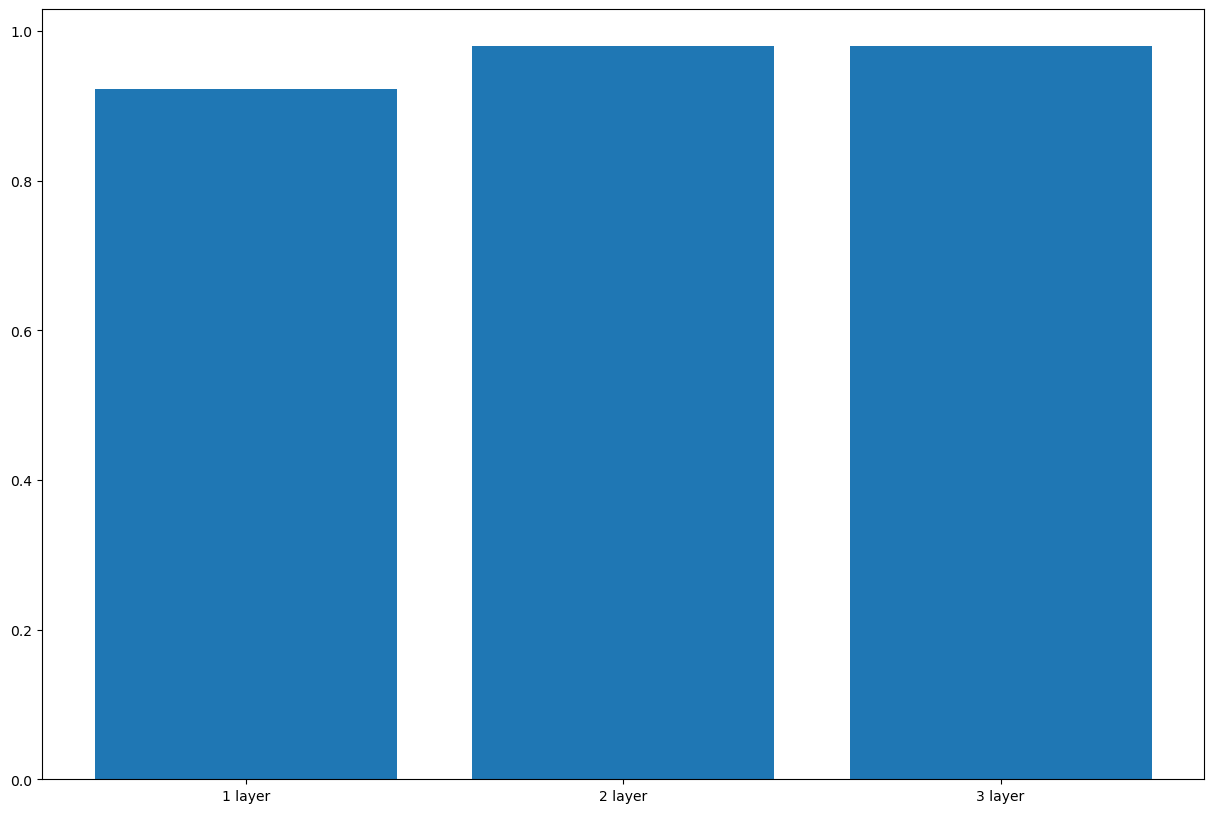

In [8]:
draw_result(x,y)

در اینجا میبینیم که استفاده از دو لایه در مقایسه با یک لایه و سه لایه بهتر عمل کرده است.
حتی میزان لاس نیز به نسبت بقیه بسیار خوب بوده است.

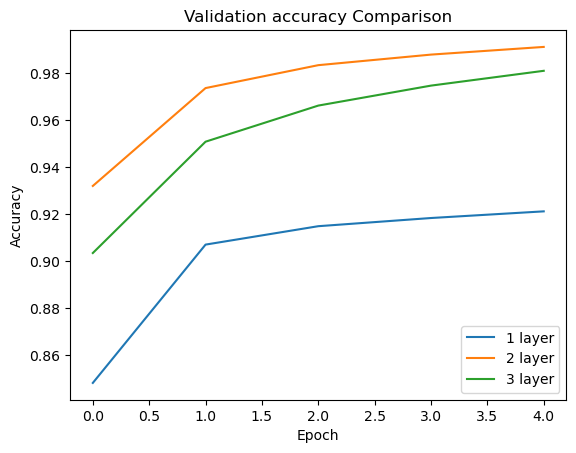

In [56]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
#plt.plot(history3.history['accuracy'])

#plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['1 layer','2 layer','3 layer'], loc='lower right')
plt.show()

استفاده از یک شبکه دولایه و سپس سه لایه با اختلاف کمی، بهتر از استفاده از شبکه تک لایه است.

## b) 1 layer

In [10]:
x=[]
y=[]

In [11]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(10, activation='softmax' ,input_shape = (28*28,))) 
#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
history=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('test_acc:' ,test_acc)
#----
x.append(test_acc)
y.append('1L-10N')

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6079 - accuracy: 0.8483
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3335 - accuracy: 0.9071
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3044 - accuracy: 0.9150
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2912 - accuracy: 0.9185
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2751 - accuracy: 0.9238
test_acc: 0.923799991607666


In [12]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(10, activation='relu' ,input_shape = (28*28,))) 
#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('test_acc:' ,test_acc)
#----

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.1082
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0980
test_acc: 0.09799999743700027


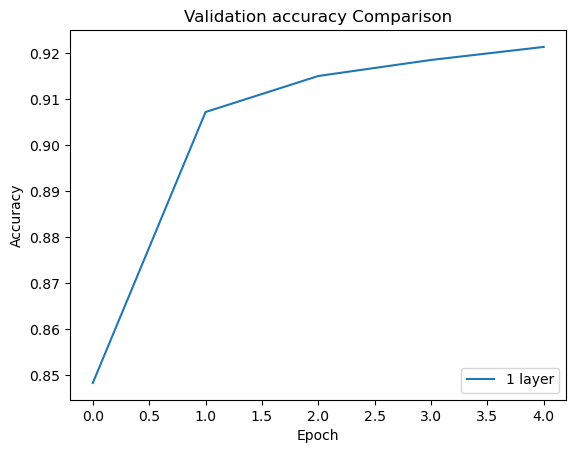

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])

plt.title('Validation accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['1 layer'], loc='lower right')
plt.show()

### Note: we can not change the number of neurons since we have 10 class and at the last layer we must have 10 neurons.Since we have only 1 layer here, we should set 10 neuron.

## 2 Layer

In [14]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(16, activation='relu' ,input_shape = (28*28,))) 
network.add(layers.Dense(10, activation='softmax')) 
#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
history1=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('test_acc:', test_acc)
x.append(test_acc)
y.append('2L-16N')

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.6114 - accuracy: 0.8359
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.3038 - accuracy: 0.9145
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2639 - accuracy: 0.9251
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2380 - accuracy: 0.9323
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2131 - accuracy: 0.9404
test_acc: 0.9404000043869019


In [15]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(32, activation='relu' ,input_shape = (28*28,))) 
network.add(layers.Dense(10, activation='softmax')) 
#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
history2=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('test_acc:' ,test_acc)
x.append(test_acc)
y.append('2L-32N')

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.4697 - accuracy: 0.8743
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2543 - accuracy: 0.9273
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2137 - accuracy: 0.9386
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1868 - accuracy: 0.9470
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1692 - accuracy: 0.9476
test_acc: 0.9476000070571899


In [16]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(64, activation='relu' ,input_shape = (28*28,))) 
network.add(layers.Dense(10, activation='softmax')) 
#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
history3=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('test_acc:' ,test_acc)
x.append(test_acc)
y.append('2L-64N')

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4034 - accuracy: 0.8896
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2110 - accuracy: 0.9410
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1584 - accuracy: 0.9548
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1281 - accuracy: 0.9631
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1135 - accuracy: 0.9669
test_acc: 0.9668999910354614


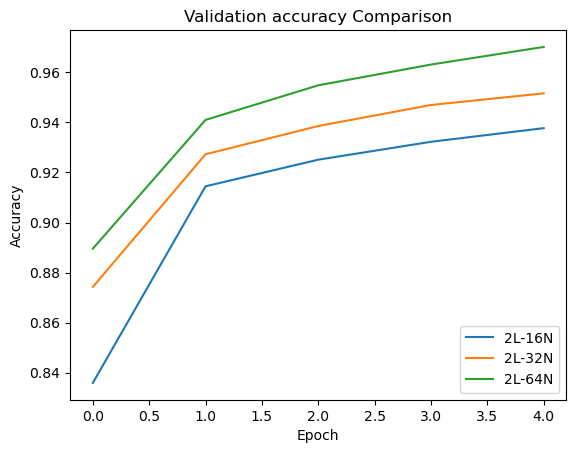

In [17]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
#plt.plot(history3.history['accuracy'])

#plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['2L-16N','2L-32N','2L-64N'], loc='lower right')
plt.show()

در یک شبکه دو لایه استتفاده از تعداد 64 نورون بهتر است.

## b) 3 layer

In [18]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(16, activation='relu' ,input_shape = (28*28,))) 
network.add(layers.Dense(32, activation='relu')) 
network.add(layers.Dense(10, activation='softmax'))
#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
history4=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('test_acc:', test_acc)

x.append(test_acc)
y.append('3L-(16_32N)')

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5447 - accuracy: 0.8491
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2654 - accuracy: 0.9234
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2226 - accuracy: 0.9347
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1989 - accuracy: 0.9410
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1724 - accuracy: 0.9469
test_acc: 0.9469000101089478


In [19]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(16, activation='relu' ,input_shape = (28*28,))) 
network.add(layers.Dense(64, activation='relu')) 
network.add(layers.Dense(10, activation='softmax'))
#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
history5=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('test_acc:' ,test_acc)

x.append(test_acc)
y.append('3L-(16_64N)')

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5243 - accuracy: 0.8582
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2444 - accuracy: 0.9298
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2044 - accuracy: 0.9401
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1818 - accuracy: 0.9470
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1728 - accuracy: 0.9497
test_acc: 0.9496999979019165


In [20]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(64, activation='relu', input_shape = (28*28,))) 
network.add(layers.Dense(32, activation='relu')) 
network.add(layers.Dense(10, activation='softmax'))
#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
history6=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('test_acc:' ,test_acc)

x.append(test_acc)
y.append('3L-(64_32N)')

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.3792 - accuracy: 0.8951
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1850 - accuracy: 0.9463
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1409 - accuracy: 0.9590
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1141 - accuracy: 0.9663
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1094 - accuracy: 0.9668
test_acc: 0.9667999744415283


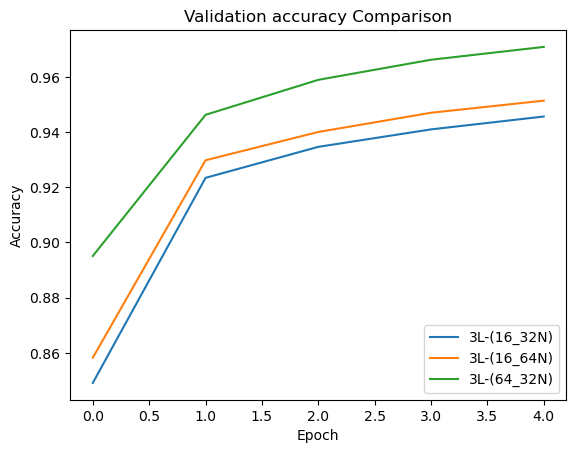

In [21]:
import matplotlib.pyplot as plt

plt.plot(history4.history['accuracy'])
plt.plot(history5.history['accuracy'])
plt.plot(history6.history['accuracy'])

plt.title('Validation accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['3L-(16_32N)','3L-(16_64N)','3L-(64_32N)'], loc='lower right')
plt.show()

در یک شبکه سه لایه استفاده از 64 و 32 نورون در لایه اخر بهتر است.

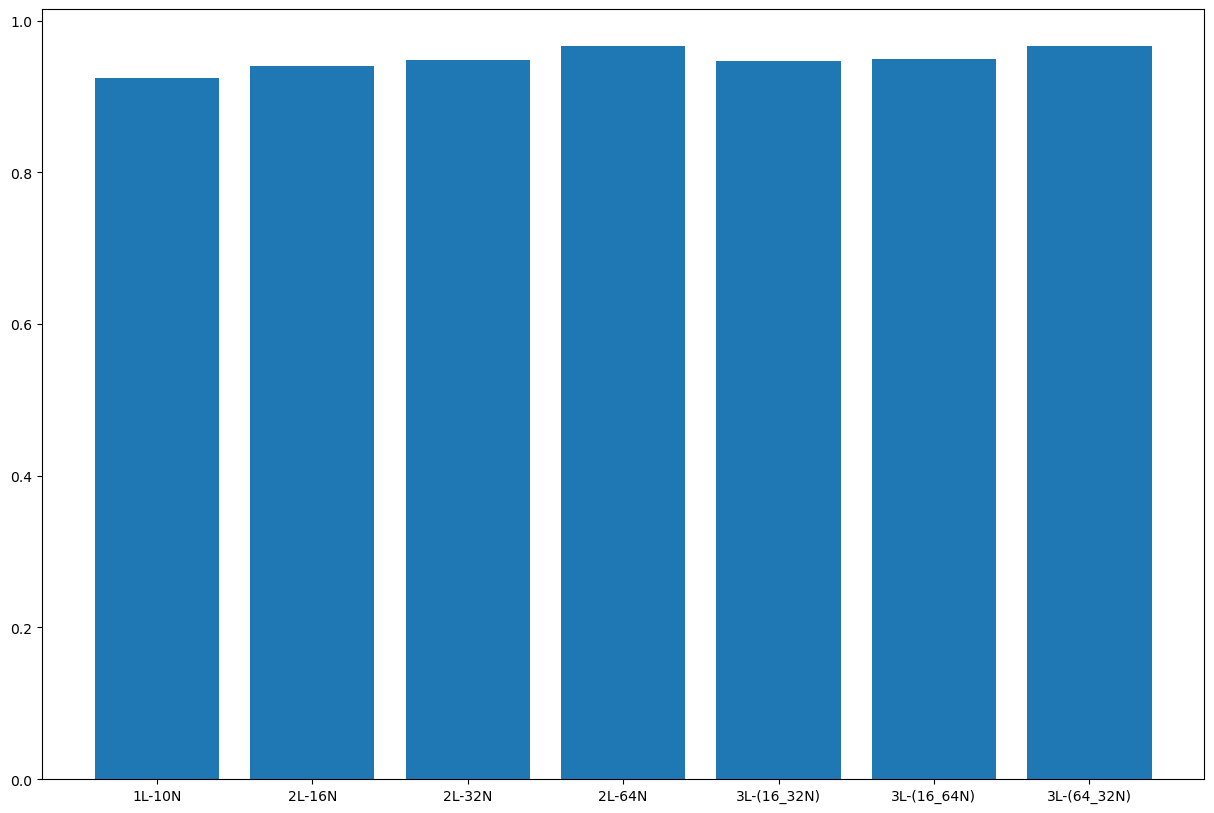

In [22]:
draw_result(x,y)

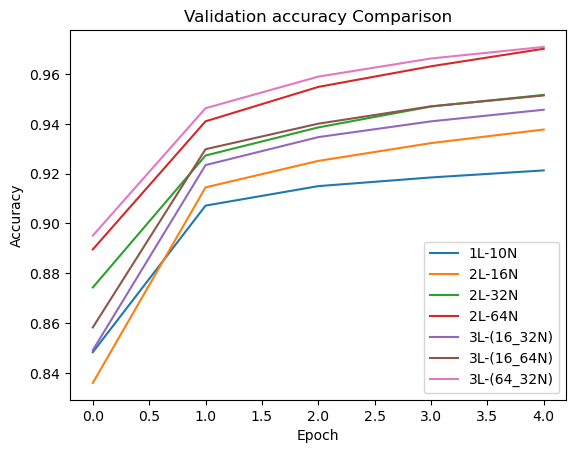

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history4.history['accuracy'])
plt.plot(history5.history['accuracy'])
plt.plot(history6.history['accuracy'])

plt.title('Validation accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(y, loc='lower right')
plt.show()

همانطور که میبینید استفاده از یک شبکه سه لایه با 64 و 32 نورون در لایه های پنهان، ما را به نتیجه بهتری رسانده است. همچنین استفاده از شبکه با دولایه و 64 نورون در لایه پنهان می تواند بسیار مفید باشد.
لذا این دو شبکه از سایرین نتیجه بهتری را داشته است.

## c) mse

In [27]:
x1=[]
y1=[]
#-----------
x2=[]
y2=[]
#-----------
x3=[]
y3=[]

In [28]:
from keras import models 
from keras import layers 

network = models.Sequential() 
network.add(layers.Dense(10, activation='softmax', input_shape=(28*28,))) 

network.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])
hc1=network.fit(train_images, train_labels, epochs=5, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print('test_acc:', test_acc)
x1.append(test_acc)
y1.append('MSE-1Layer')

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0289 - accuracy: 0.8357
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0162 - accuracy: 0.9006
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0145 - accuracy: 0.9094
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0137 - accuracy: 0.9139
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0124 - accuracy: 0.9217
test_acc: 0.9217000007629395


In [29]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(512, activation='relu' ,input_shape = (28*28,))) 
network.add(layers.Dense(10, activation='softmax')) 
#----
network.compile (optimizer ='rmsprop', loss= 'mean_squared_error',  metrics= ['accuracy'])
hc2=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('test_acc:' ,test_acc)
x2.append(test_acc)
y2.append('MSE-2Layer')

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.0189 - accuracy: 0.8843
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0095 - accuracy: 0.9408
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0074 - accuracy: 0.9548
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0061 - accuracy: 0.9632
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9675
test_acc: 0.9674999713897705


In [30]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(512, activation='relu' ,input_shape = (28*28,))) 
network.add(layers.Dense(512, activation='relu')) 
network.add(layers.Dense(10, activation='softmax'))
#----
network.compile (optimizer ='rmsprop', loss= 'mean_squared_error',  metrics= ['accuracy'])
hc3=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('test_acc:' ,test_acc)
x3.append(test_acc)
y3.append('MSE-3Layer')

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.0178 - accuracy: 0.8857
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0080 - accuracy: 0.9495
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0058 - accuracy: 0.9637
Epoch 4/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0045 - accuracy: 0.9722
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0041 - accuracy: 0.9733
test_acc: 0.9732999801635742


## c)cross_entropy

In [31]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(10, activation='softmax' ,input_shape = (28*28,))) 
#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
hcc1=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('test_acc:' ,test_acc)
x1.append(test_acc)
y1.append('CrossEntropy-1Layer')

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6077 - accuracy: 0.8473
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3336 - accuracy: 0.9074
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3048 - accuracy: 0.9148
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2913 - accuracy: 0.9183
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.2826 - accuracy: 0.9222
test_acc: 0.9222000241279602


استفاده از تابع لاس متفاوت تفاوت چشمگیری در نتیجه نداشته است. البته این مربوط به زمانی است که از یک لایه شبکه استفاده کنیم.

In [32]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(512, activation='relu' ,input_shape = (28*28,))) 
network.add(layers.Dense(10, activation='softmax')) 
#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
hcc2=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('test_acc:' ,test_acc)
x2.append(test_acc)
y2.append('CrossEntropy-2Layer')

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.2632 - accuracy: 0.9244
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1081 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0704 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0514 - accuracy: 0.9845
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0607 - accuracy: 0.9814
test_acc: 0.9814000129699707


زمانی که از شبکه دولایه ای استفاده میکنیم، نتیجه استفاده از تابع لاس کراس اینتروپی بهتر از تابع میانگین مجذور مربعات است.

In [33]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(512, activation='relu' ,input_shape = (28*28,))) 
network.add(layers.Dense(200, activation='relu')) 
network.add(layers.Dense(10, activation='softmax'))
#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
hcc3=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('test_acc:' ,test_acc)
x3.append(test_acc)
y3.append('CrossEntropy-3Layer')

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.2371 - accuracy: 0.9285
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0874 - accuracy: 0.9733
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0561 - accuracy: 0.9824
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0395 - accuracy: 0.9875
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0735 - accuracy: 0.9797
test_acc: 0.9797000288963318


زمانی که از شبکه سه لایه ای استفاده میکنیم، نتیجه استفاده از تابع لاس کراس اینتروپی بهتر از تابع میانگین مجذور مربعات است.

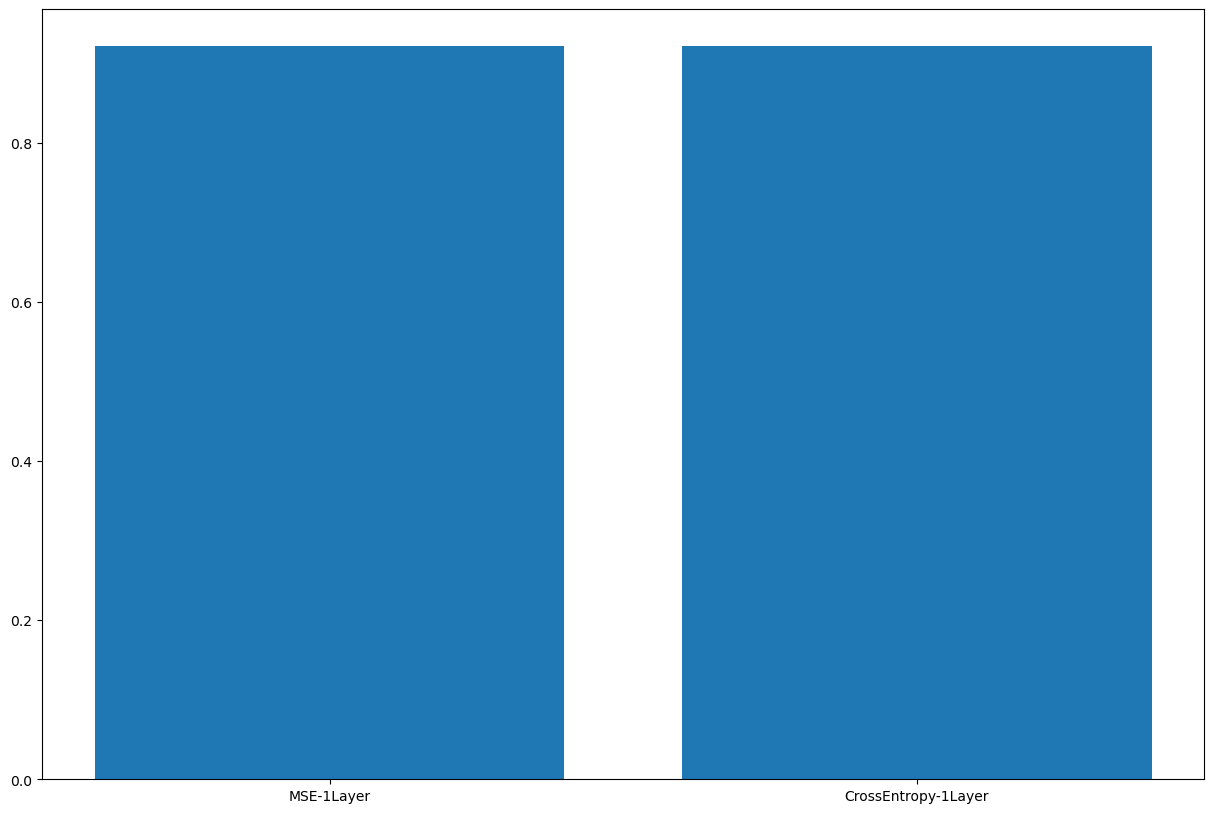

In [34]:
draw_result(x1,y1)

استفاده از تابع لاس متفاوت تفاوت چشمگیری در نتیجه نداشته است. البته این مربوط به زمانی است که از یک لایه شبکه استفاده کنیم.

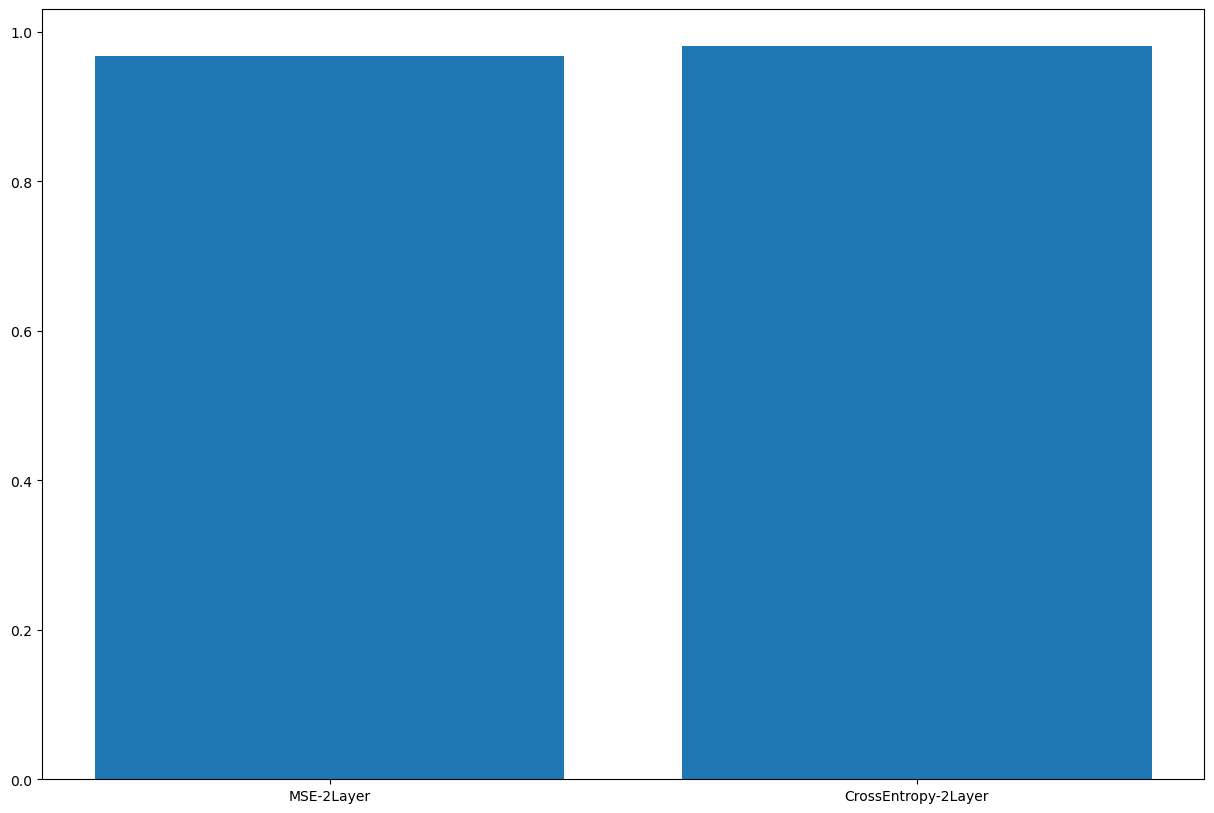

In [35]:
draw_result(x2,y2)

زمانی که از شبکه دولایه ای استفاده میکنیم، نتیجه استفاده از تابع لاس کراس اینتروپی بهتر از تابع میانگین مجذور مربعات است.

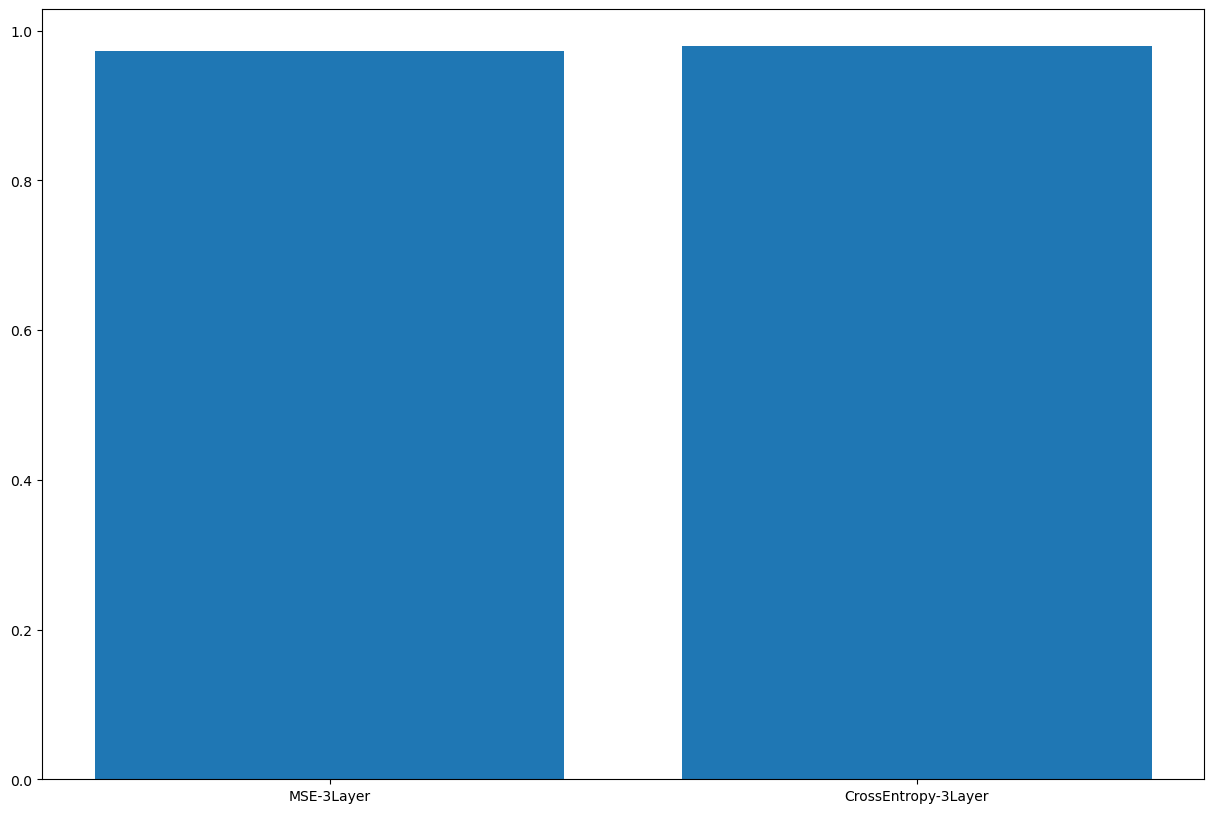

In [37]:
draw_result(x3,y3)

زمانی که از شبکه سه لایه ای استفاده میکنیم، نتیجه استفاده از تابع لاس کراس اینتروپی بهتر از تابع میانگین مجذور مربعات است.

### به طور کلی استفاده از تابع کراس اینتروپی نتیجه را بهتر نشان می دهد.

## d) one layer

In [38]:
x1=[]
y1=[]

In [39]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(10, activation='tanh' ,input_shape = (28*28,))) 
#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
history1=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('test_acc:' ,test_acc)

x1.append(test_acc)
y1.append('Tanh')

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 8.6179 - accuracy: 0.1124
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 8.7580 - accuracy: 0.1070
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 8.7780 - accuracy: 0.1172
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 9.1472 - accuracy: 0.1041
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 7.9982 - accuracy: 0.0989
test_acc: 0.09889999777078629


In [40]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(10, activation='relu' ,input_shape = (28*28,))) 
#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
history2=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('test_acc:' ,test_acc)

x1.append(test_acc)
y1.append('ReLU')

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0995
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0987
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0987
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0987
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0980
test_acc: 0.09799999743700027


In [41]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(10, activation='sigmoid' ,input_shape = (28*28,))) 
#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
history3=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('test_acc:' ,test_acc)

x1.append(test_acc)
y1.append('Sigmoid')

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6193 - accuracy: 0.8414
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3337 - accuracy: 0.9074
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3042 - accuracy: 0.9156
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2912 - accuracy: 0.9185
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2757 - accuracy: 0.9233
test_acc: 0.92330002784729


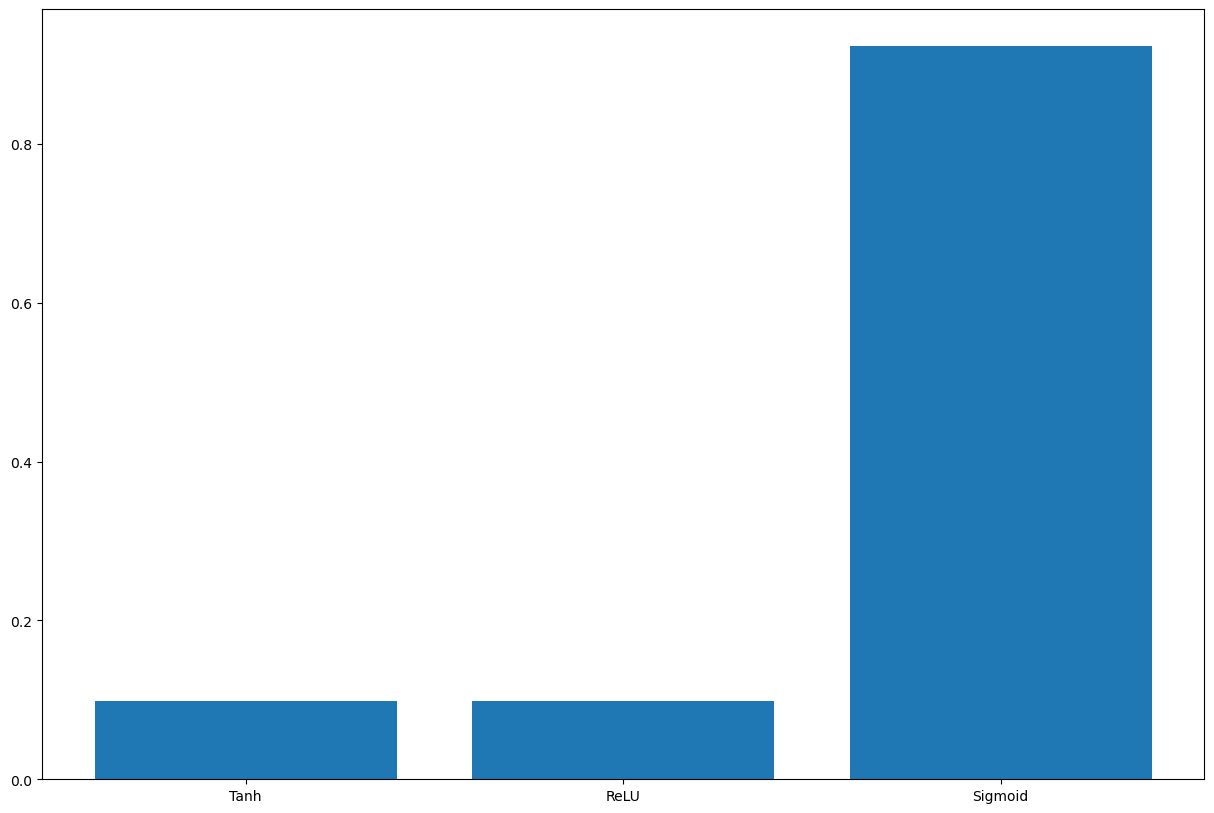

In [42]:
draw_result(x1,y1)

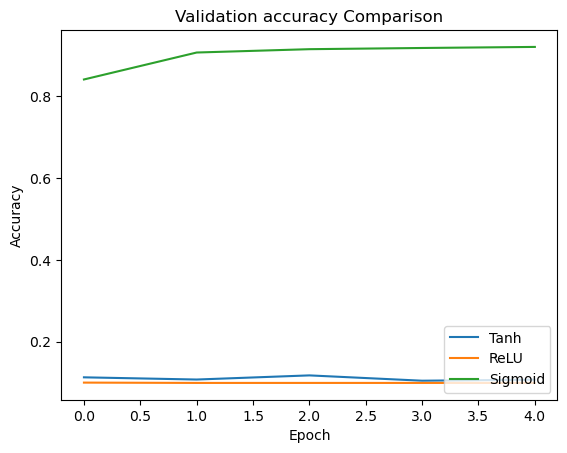

In [43]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
#plt.plot(history3.history['accuracy'])

#plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(y1, loc='lower right')
plt.show()

به طور کلی استفاده از تابع سیگموید بسیار بهتر از ریلو و تانژانت می باشد لذا اصلا منطقی نیست در یک شبکه تک لایه که اخرین لایه محسوب می شود از تابع تانژانت و یا ریلو استفاده شود و بهتر است از تابع سیگموید استفاده شود.

## d) two layer

In [44]:
x2=[]
y2=[]

In [45]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(512, activation='relu' ,input_shape = (28*28,))) 
network.add(layers.Dense(10, activation='softmax')) 
#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
history1=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('Test_acc:', test_acc)

x2.append(test_acc)
y2.append('ReLU-Softmax')

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2625 - accuracy: 0.9250
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1064 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0697 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0509 - accuracy: 0.9849
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0596 - accuracy: 0.9820
Test_acc: 0.9819999933242798


In [46]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(512, activation='tanh', input_shape = (28*28,))) 
network.add(layers.Dense(10, activation='softmax')) 
#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
history2=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('Test_acc:', test_acc)
x2.append(test_acc)
y2.append('Tanh-Softmax')

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3410 - accuracy: 0.9003
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1832 - accuracy: 0.9464
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1235 - accuracy: 0.9642
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0911 - accuracy: 0.9731
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0853 - accuracy: 0.9749
Test_acc: 0.9749000072479248


In [47]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(512, activation='sigmoid' ,input_shape = (28*28,))) 
network.add(layers.Dense(10, activation='softmax')) 
#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
history3=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('Test_acc:', test_acc)
x2.append(test_acc)
y2.append('Sigmoid-Softmax')

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.4569 - accuracy: 0.8764
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2664 - accuracy: 0.9226
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2136 - accuracy: 0.9383
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1729 - accuracy: 0.9495
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1374 - accuracy: 0.9591
Test_acc: 0.9591000080108643


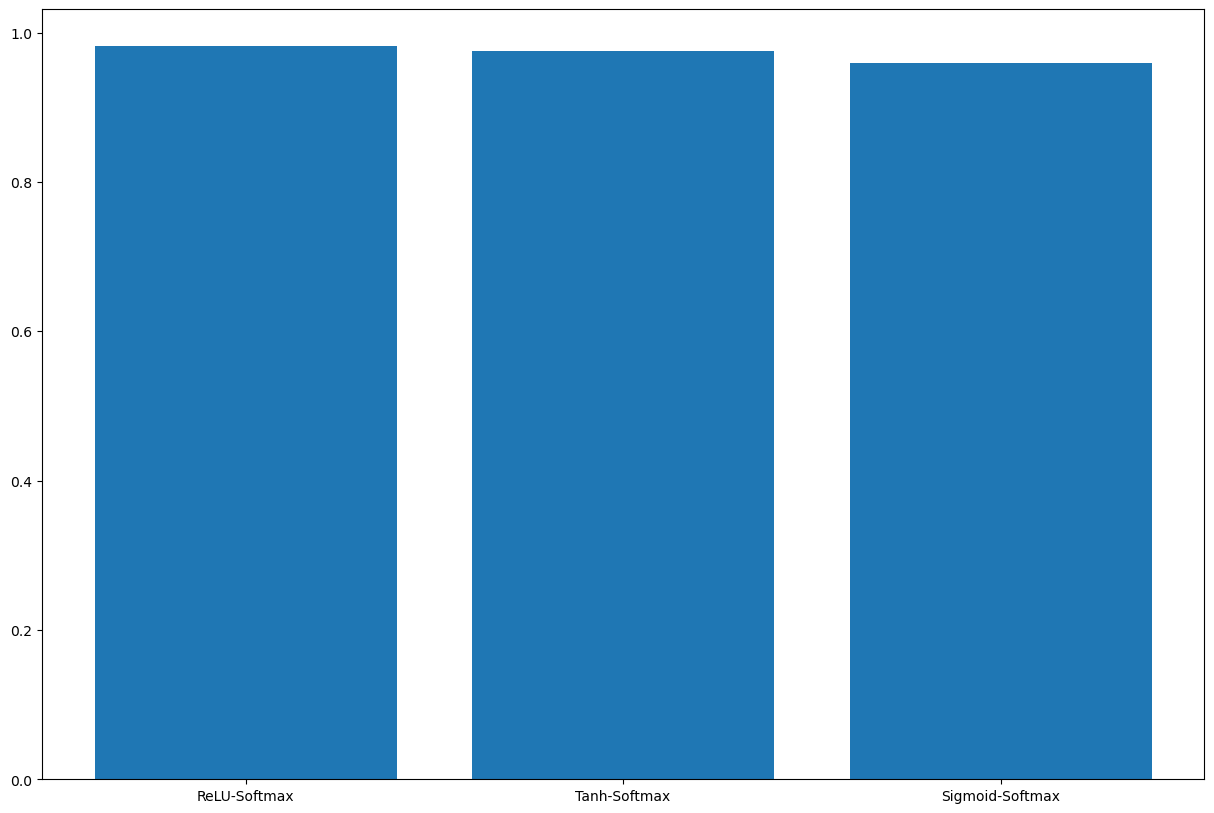

In [48]:
draw_result(x2,y2)

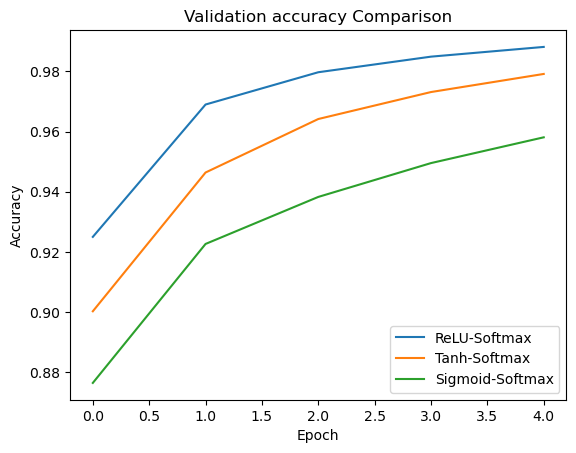

In [49]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
#plt.plot(history3.history['accuracy'])

#plt.plot(history.history['val_accuracy'])
plt.title('accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(y2, loc='lower right')
plt.show()

استفاده از تابع سافتمکس در لایه اخر به صورت پیش فرض برای مقایسه سه تابع دیگر می باشد. اگر بخواهیم به جزئیات بها دهیم استفاده از شبکه ای که از ریلو و سافتمکس استفاده میکند، بهتر است. 

## d) three layer

In [50]:
x3=[]
y3=[]

In [51]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(512, activation='relu' ,input_shape = (28*28,))) 
network.add(layers.Dense(256, activation='tanh')) 
network.add(layers.Dense(10, activation='softmax'))
#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
history1=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('Test_acc:' ,test_acc)

x3.append(test_acc)
y3.append('ReLU-Tanh-Softmax')

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2241 - accuracy: 0.9321
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0833 - accuracy: 0.9738
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0537 - accuracy: 0.9835
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0373 - accuracy: 0.9880
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0669 - accuracy: 0.9801
Test_acc: 0.9800999760627747


In [52]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(512, activation='tanh' ,input_shape = (28*28,))) 
network.add(layers.Dense(256, activation='sigmoid')) 
network.add(layers.Dense(10, activation='softmax'))
#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
history2=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('Test_acc:', test_acc)
x3.append(test_acc)
y3.append('Tanh-Sigmoid-Softmax')

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3400 - accuracy: 0.9036
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1645 - accuracy: 0.9510
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1134 - accuracy: 0.9663
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0843 - accuracy: 0.9748
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0968 - accuracy: 0.9683
Test_acc: 0.9682999849319458


In [53]:
from keras import models 
from keras import layers 
network = models.Sequential() 
#----
network.add(layers.Dense(512, activation='relu' ,input_shape = (28*28,))) 
network.add(layers.Dense(256, activation='sigmoid')) 
network.add(layers.Dense(10, activation='softmax'))
#----
network.compile (optimizer ='rmsprop', loss= 'categorical_crossentropy',  metrics= ['accuracy'])
history3=network.fit (train_images, train_labels, epochs = 5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print ('Test_acc:' ,test_acc)
x3.append(test_acc)
y3.append('ReLU-Sigmoid-Softmax')

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.3169 - accuracy: 0.9098
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1175 - accuracy: 0.9643
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0765 - accuracy: 0.9768
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0540 - accuracy: 0.9833
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0645 - accuracy: 0.9784
Test_acc: 0.9783999919891357


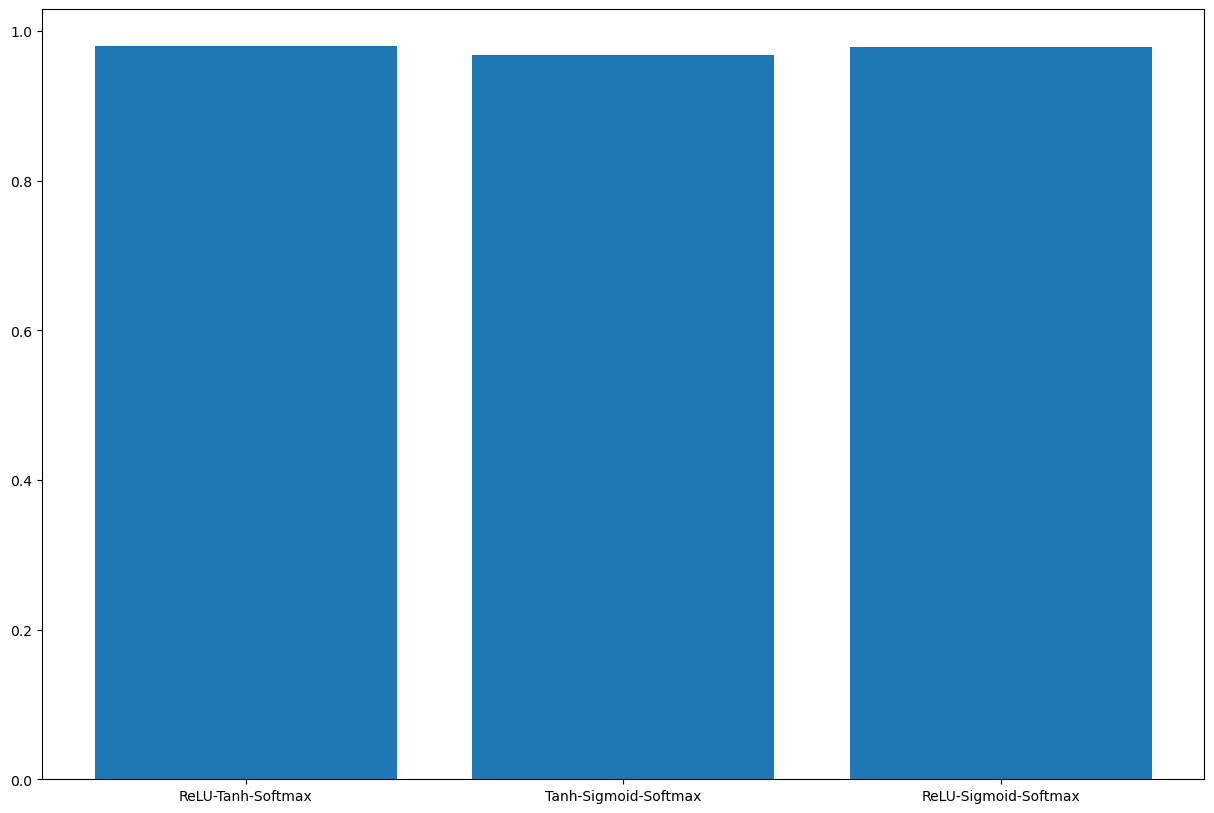

In [54]:
draw_result(x3,y3)

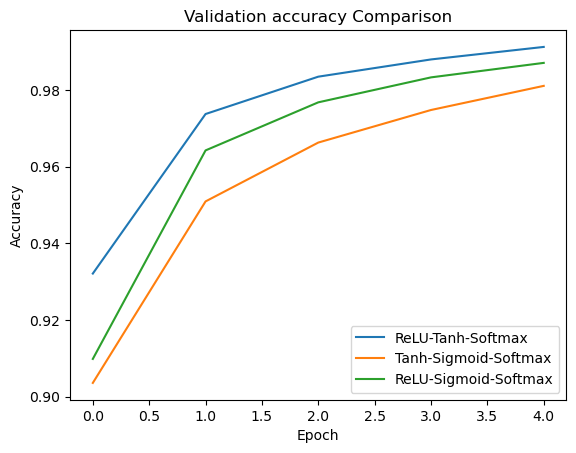

In [55]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])

plt.title('Validation accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(y3, loc='lower right')
plt.show()

استفاده از تابع سافتمکس در اخرین لایه مرسوم است. لذا ما به طور پیش فرض اخرین لایه را سافتمکس در نظر گرفتیم و تاثیر سایر توابع را در لایه های دیگر بررسی کردیم. در اینجا سه نمونه را مشاهده میکنید که بررسی نتایج نشان داده است استفاده از ترکیب ریلو تانژانت سافتمکس نتیجه بهتری داشته است. 

# Q2

In [57]:
import tensorflow as tf
from tensorflow import keras

imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [58]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [59]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)


## a)

## 1 layer

In [60]:
x_loss=[]
y_loss=[]

x_acc=[]
y_acc=[]

In [63]:
from keras.models import Sequential
from keras.layers import Dense




model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])


x_loss.append(results[0])
y_loss.append('Loss_1Layer')

x_acc.append(results[1])
y_acc.append('Accuracy_1Layer')

Epoch 1/10
40/40 - 2s - loss: 0.5159 - accuracy: 0.7911 - val_loss: 0.3837 - val_accuracy: 0.8644 - 2s/epoch - 50ms/step
Epoch 2/10
40/40 - 1s - loss: 0.3091 - accuracy: 0.8975 - val_loss: 0.3135 - val_accuracy: 0.8778 - 548ms/epoch - 14ms/step
Epoch 3/10
40/40 - 1s - loss: 0.2381 - accuracy: 0.9208 - val_loss: 0.2839 - val_accuracy: 0.8860 - 556ms/epoch - 14ms/step
Epoch 4/10
40/40 - 1s - loss: 0.1956 - accuracy: 0.9363 - val_loss: 0.2740 - val_accuracy: 0.8870 - 534ms/epoch - 13ms/step
Epoch 5/10
40/40 - 1s - loss: 0.1665 - accuracy: 0.9464 - val_loss: 0.2727 - val_accuracy: 0.8852 - 581ms/epoch - 15ms/step
Epoch 6/10
40/40 - 1s - loss: 0.1449 - accuracy: 0.9543 - val_loss: 0.2774 - val_accuracy: 0.8864 - 583ms/epoch - 15ms/step
Epoch 7/10
40/40 - 1s - loss: 0.1277 - accuracy: 0.9618 - val_loss: 0.2850 - val_accuracy: 0.8818 - 582ms/epoch - 15ms/step
Epoch 8/10
40/40 - 1s - loss: 0.1136 - accuracy: 0.9665 - val_loss: 0.2933 - val_accuracy: 0.8812 - 614ms/epoch - 15ms/step
Epoch 9/10


## 2 layer

In [64]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

x_loss.append(results[0])
y_loss.append('Loss_2Layer')

x_acc.append(results[1])
y_acc.append('Accuracy_2Layer')

Epoch 1/10
40/40 - 2s - loss: 0.5290 - accuracy: 0.7890 - val_loss: 0.3725 - val_accuracy: 0.8602 - 2s/epoch - 62ms/step
Epoch 2/10
40/40 - 1s - loss: 0.2817 - accuracy: 0.9036 - val_loss: 0.2887 - val_accuracy: 0.8838 - 634ms/epoch - 16ms/step
Epoch 3/10
40/40 - 1s - loss: 0.2009 - accuracy: 0.9316 - val_loss: 0.2740 - val_accuracy: 0.8864 - 605ms/epoch - 15ms/step
Epoch 4/10
40/40 - 1s - loss: 0.1565 - accuracy: 0.9480 - val_loss: 0.2805 - val_accuracy: 0.8834 - 627ms/epoch - 16ms/step
Epoch 5/10
40/40 - 1s - loss: 0.1255 - accuracy: 0.9614 - val_loss: 0.2981 - val_accuracy: 0.8792 - 613ms/epoch - 15ms/step
Epoch 6/10
40/40 - 1s - loss: 0.1021 - accuracy: 0.9706 - val_loss: 0.3205 - val_accuracy: 0.8780 - 611ms/epoch - 15ms/step
Epoch 7/10
40/40 - 1s - loss: 0.0800 - accuracy: 0.9790 - val_loss: 0.3489 - val_accuracy: 0.8730 - 650ms/epoch - 16ms/step
Epoch 8/10
40/40 - 1s - loss: 0.0635 - accuracy: 0.9848 - val_loss: 0.3794 - val_accuracy: 0.8700 - 614ms/epoch - 15ms/step
Epoch 9/10


## 3 layer

In [66]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history3 = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

x_loss.append(results[0])
y_loss.append('Loss_3Layer')

x_acc.append(results[1])
y_acc.append('Accuracy_3Layer')

Epoch 1/10
40/40 - 3s - loss: 0.5498 - accuracy: 0.7714 - val_loss: 0.3725 - val_accuracy: 0.8670 - 3s/epoch - 64ms/step
Epoch 2/10
40/40 - 1s - loss: 0.2692 - accuracy: 0.9076 - val_loss: 0.2734 - val_accuracy: 0.8874 - 611ms/epoch - 15ms/step
Epoch 3/10
40/40 - 1s - loss: 0.1756 - accuracy: 0.9398 - val_loss: 0.2811 - val_accuracy: 0.8840 - 605ms/epoch - 15ms/step
Epoch 4/10
40/40 - 1s - loss: 0.1298 - accuracy: 0.9573 - val_loss: 0.3444 - val_accuracy: 0.8718 - 618ms/epoch - 15ms/step
Epoch 5/10
40/40 - 1s - loss: 0.1034 - accuracy: 0.9662 - val_loss: 0.3522 - val_accuracy: 0.8744 - 594ms/epoch - 15ms/step
Epoch 6/10
40/40 - 1s - loss: 0.0739 - accuracy: 0.9787 - val_loss: 0.3928 - val_accuracy: 0.8688 - 645ms/epoch - 16ms/step
Epoch 7/10
40/40 - 1s - loss: 0.0531 - accuracy: 0.9869 - val_loss: 0.4500 - val_accuracy: 0.8680 - 621ms/epoch - 16ms/step
Epoch 8/10
40/40 - 1s - loss: 0.0385 - accuracy: 0.9923 - val_loss: 0.4980 - val_accuracy: 0.8670 - 600ms/epoch - 15ms/step
Epoch 9/10


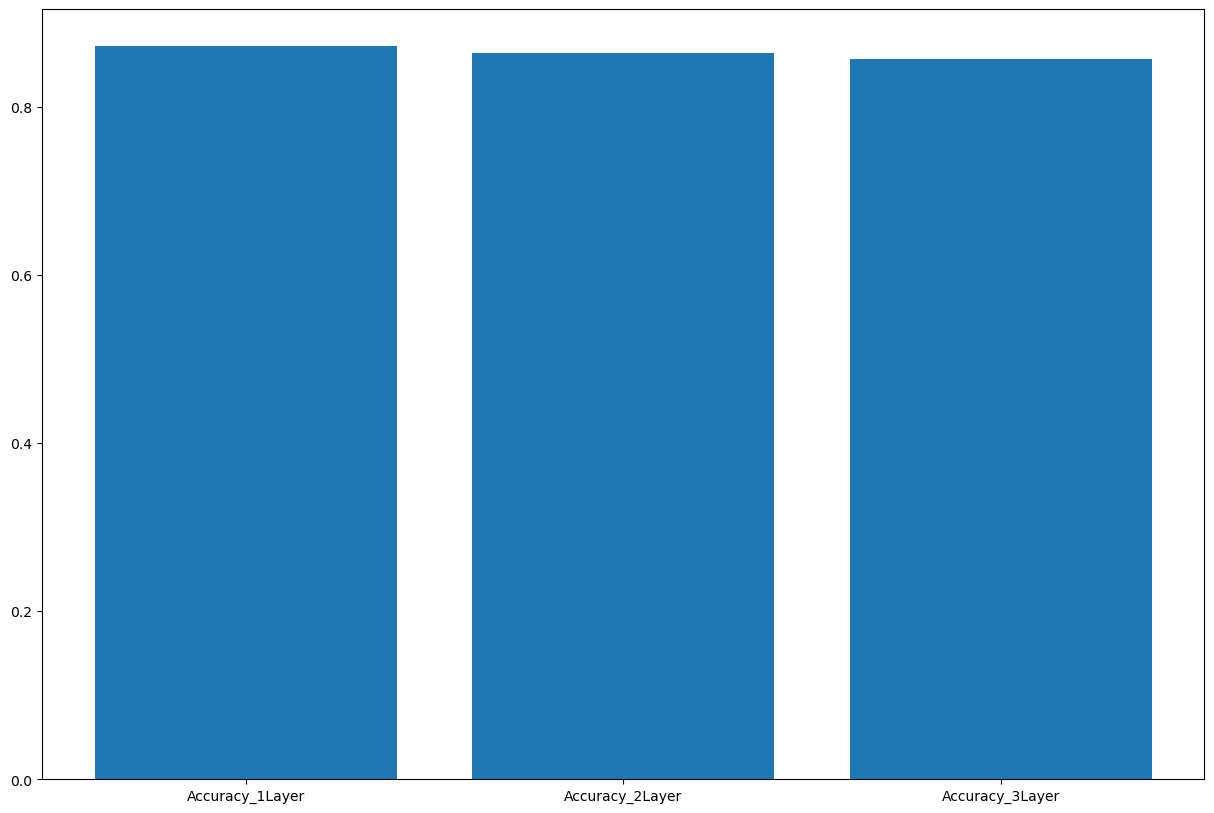

In [67]:
#accuracy
draw_result(x_acc,y_acc)

بررسی نتایح نشان میدهد که استفاده از یک شبکه تک لایه نتیجه بهتری را داشته است. پس از ان به تریتیب شبکه دو و سه لایه نتیجه خوبی را داشته است.

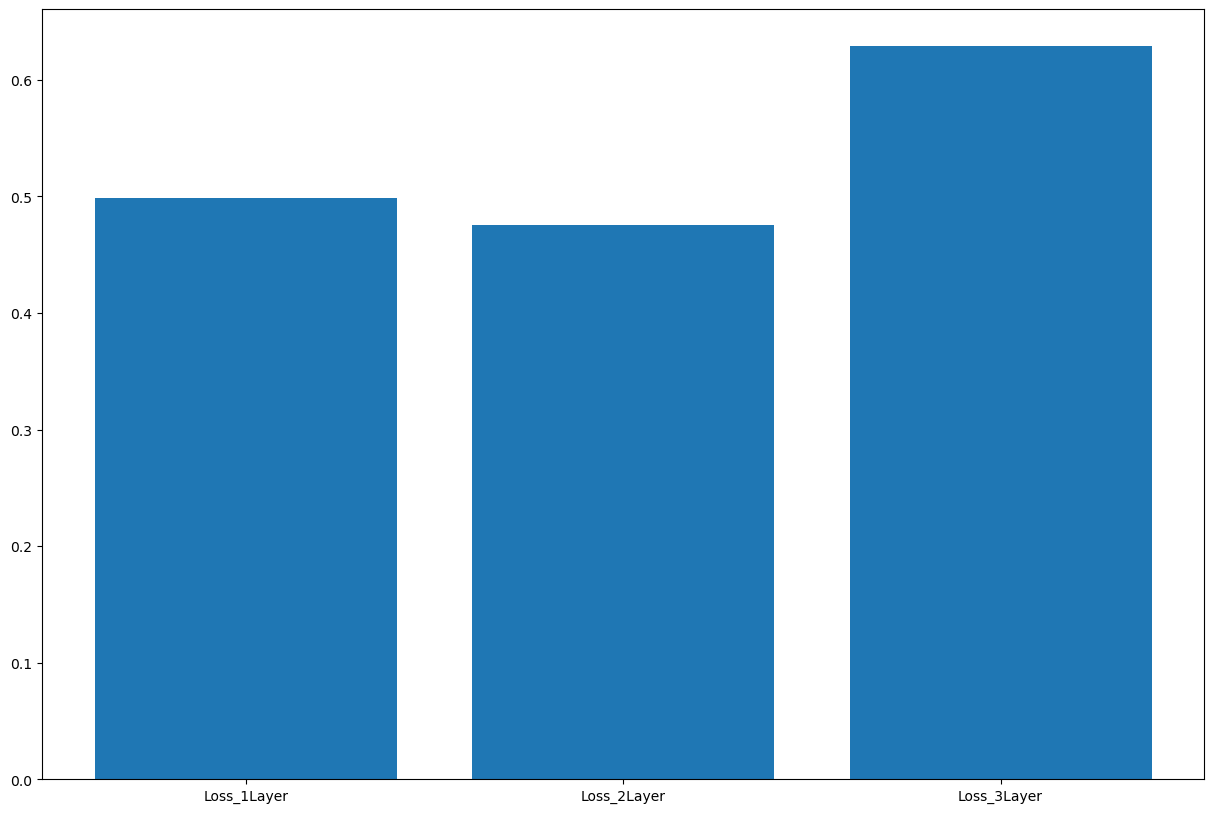

In [68]:
#Loss
draw_result(x_loss,y_loss)

در اینجا میبینیم که اتلاف شبکه دو لایه بسیار کمتر از دو شبکه دیگر است. و در عین حال شبکه سه لایه اتلاف بیشتری داشته است.

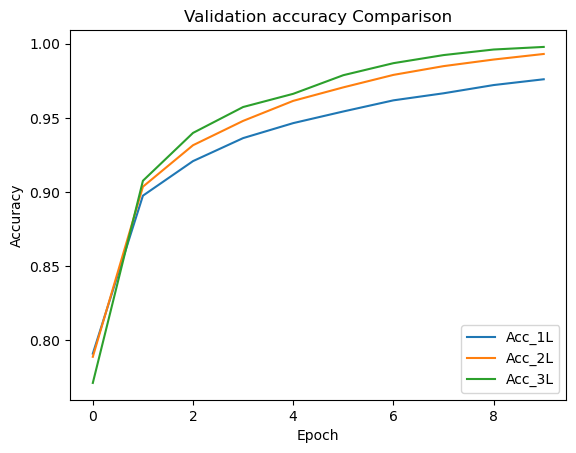

In [71]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])

plt.title('Validation accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Acc_1L','Acc_2L','Acc_3L'], loc='lower right')
plt.show()

## b) 1 layer

In [72]:
x1_acc=[]
y1_acc=[]

x1_loss=[]
y1_loss=[]

In [73]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(10000,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])


x1_loss.append(results[0])
y1_loss.append('Loss-1L-32N')

x1_acc.append(results[1])
y1_acc.append('Accuracy-1L-32N')



Epoch 1/20
40/40 - 2s - loss: 0.4564 - accuracy: 0.8212 - val_loss: 0.3231 - val_accuracy: 0.8768 - 2s/epoch - 54ms/step
Epoch 2/20
40/40 - 1s - loss: 0.2496 - accuracy: 0.9161 - val_loss: 0.2803 - val_accuracy: 0.8850 - 755ms/epoch - 19ms/step
Epoch 3/20
40/40 - 1s - loss: 0.1913 - accuracy: 0.9367 - val_loss: 0.2764 - val_accuracy: 0.8860 - 812ms/epoch - 20ms/step
Epoch 4/20
40/40 - 1s - loss: 0.1576 - accuracy: 0.9494 - val_loss: 0.2801 - val_accuracy: 0.8832 - 785ms/epoch - 20ms/step
Epoch 5/20
40/40 - 1s - loss: 0.1343 - accuracy: 0.9592 - val_loss: 0.2891 - val_accuracy: 0.8814 - 808ms/epoch - 20ms/step
Epoch 6/20
40/40 - 1s - loss: 0.1143 - accuracy: 0.9666 - val_loss: 0.3017 - val_accuracy: 0.8782 - 795ms/epoch - 20ms/step
Epoch 7/20
40/40 - 1s - loss: 0.0984 - accuracy: 0.9718 - val_loss: 0.3172 - val_accuracy: 0.8766 - 752ms/epoch - 19ms/step
Epoch 8/20
40/40 - 1s - loss: 0.0847 - accuracy: 0.9779 - val_loss: 0.3416 - val_accuracy: 0.8732 - 799ms/epoch - 20ms/step
Epoch 9/20


In [74]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

x1_loss.append(results[0])
y1_loss.append('Loss-1L-64N')

x1_acc.append(results[1])
y1_acc.append('Accuracy-1L-64N')

Epoch 1/20
40/40 - 3s - loss: 0.4500 - accuracy: 0.8124 - val_loss: 0.3051 - val_accuracy: 0.8852 - 3s/epoch - 78ms/step
Epoch 2/20
40/40 - 1s - loss: 0.2308 - accuracy: 0.9211 - val_loss: 0.2740 - val_accuracy: 0.8878 - 1s/epoch - 28ms/step
Epoch 3/20
40/40 - 1s - loss: 0.1742 - accuracy: 0.9408 - val_loss: 0.2732 - val_accuracy: 0.8894 - 1s/epoch - 28ms/step
Epoch 4/20
40/40 - 1s - loss: 0.1407 - accuracy: 0.9546 - val_loss: 0.2920 - val_accuracy: 0.8830 - 1s/epoch - 27ms/step
Epoch 5/20
40/40 - 1s - loss: 0.1164 - accuracy: 0.9635 - val_loss: 0.3051 - val_accuracy: 0.8818 - 1s/epoch - 27ms/step
Epoch 6/20
40/40 - 1s - loss: 0.0968 - accuracy: 0.9715 - val_loss: 0.3273 - val_accuracy: 0.8782 - 990ms/epoch - 25ms/step
Epoch 7/20
40/40 - 1s - loss: 0.0809 - accuracy: 0.9775 - val_loss: 0.3507 - val_accuracy: 0.8758 - 1s/epoch - 27ms/step
Epoch 8/20
40/40 - 1s - loss: 0.0706 - accuracy: 0.9823 - val_loss: 0.3797 - val_accuracy: 0.8720 - 1s/epoch - 27ms/step
Epoch 9/20
40/40 - 1s - loss:

In [75]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history3 = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])


x1_loss.append(results[0])
y1_loss.append('Loss-1L-16N')

x1_acc.append(results[1])
y1_acc.append('Accuracy-1L-16N')

Epoch 1/20
40/40 - 2s - loss: 0.4926 - accuracy: 0.8073 - val_loss: 0.3584 - val_accuracy: 0.8682 - 2s/epoch - 55ms/step
Epoch 2/20
40/40 - 1s - loss: 0.2855 - accuracy: 0.9050 - val_loss: 0.3008 - val_accuracy: 0.8804 - 631ms/epoch - 16ms/step
Epoch 3/20
40/40 - 1s - loss: 0.2232 - accuracy: 0.9273 - val_loss: 0.2832 - val_accuracy: 0.8822 - 610ms/epoch - 15ms/step
Epoch 4/20
40/40 - 1s - loss: 0.1867 - accuracy: 0.9398 - val_loss: 0.2750 - val_accuracy: 0.8848 - 607ms/epoch - 15ms/step
Epoch 5/20
40/40 - 1s - loss: 0.1595 - accuracy: 0.9498 - val_loss: 0.2814 - val_accuracy: 0.8814 - 581ms/epoch - 15ms/step
Epoch 6/20
40/40 - 1s - loss: 0.1414 - accuracy: 0.9572 - val_loss: 0.2855 - val_accuracy: 0.8810 - 602ms/epoch - 15ms/step
Epoch 7/20
40/40 - 1s - loss: 0.1245 - accuracy: 0.9640 - val_loss: 0.2896 - val_accuracy: 0.8822 - 590ms/epoch - 15ms/step
Epoch 8/20
40/40 - 1s - loss: 0.1106 - accuracy: 0.9692 - val_loss: 0.3011 - val_accuracy: 0.8798 - 627ms/epoch - 16ms/step
Epoch 9/20


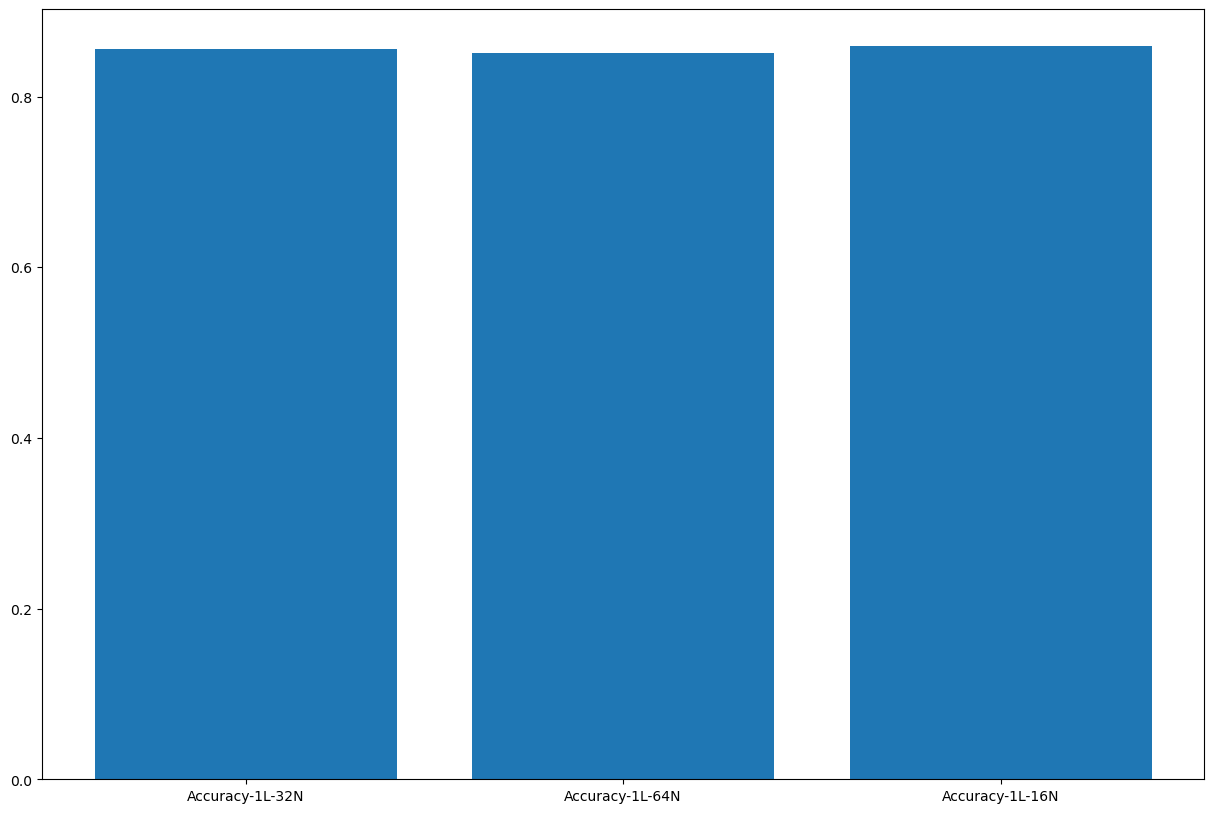

In [76]:
draw_result(x1_acc , y1_acc)

این دو نمودار نشان میدهند که استفاده 16 نورون در یک شبکه تک لایه هم اتلاف کمتری دارد هم اکیورسی بالاتری را نشان میدهد.  به طور کلی هرچه تعداد نورون ها بیشتر باشد، اتلاف بالایی را داریم و این چیزی نیست که ما در پی ان باشیم.

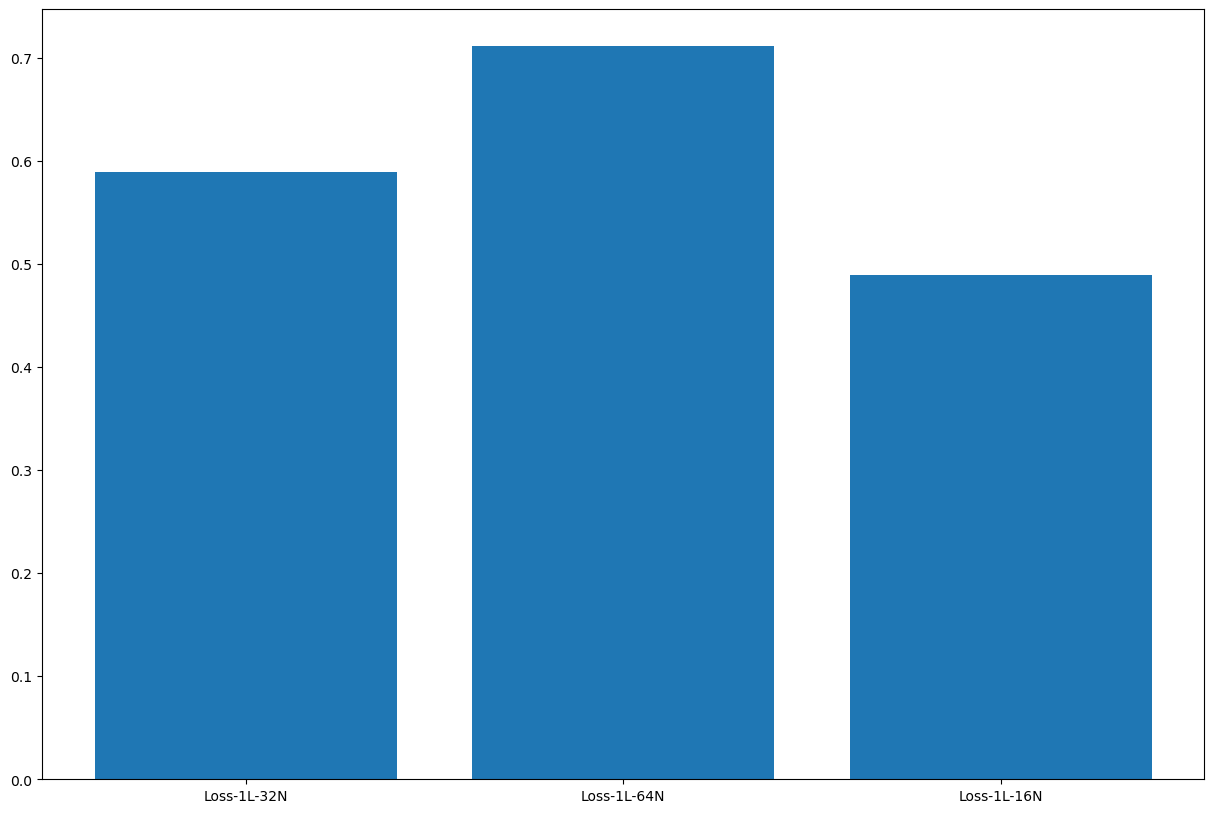

In [77]:
draw_result(x1_loss , y1_loss)

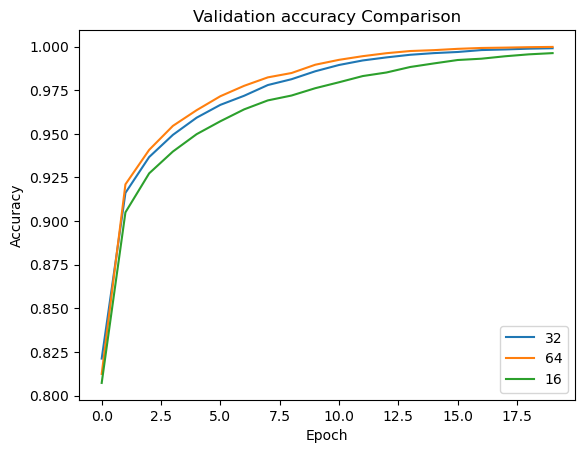

In [78]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])

plt.title('Validation accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['32','64','16'], loc='lower right')
plt.show()

## b) 2 layer

In [79]:
x2_acc=[]
y2_acc=[]

x2_loss=[]
y2_loss=[]

In [80]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])



x2_loss.append(results[0])
y2_loss.append('Loss-2L-(16_32N)')

x2_acc.append(results[1])
y2_acc.append('Accuracy-2L-(16_32N)')

Epoch 1/20
40/40 - 3s - loss: 0.5146 - accuracy: 0.7853 - val_loss: 0.3327 - val_accuracy: 0.8698 - 3s/epoch - 66ms/step
Epoch 2/20
40/40 - 1s - loss: 0.2491 - accuracy: 0.9114 - val_loss: 0.2769 - val_accuracy: 0.8842 - 600ms/epoch - 15ms/step
Epoch 3/20
40/40 - 1s - loss: 0.1739 - accuracy: 0.9400 - val_loss: 0.2808 - val_accuracy: 0.8816 - 597ms/epoch - 15ms/step
Epoch 4/20
40/40 - 1s - loss: 0.1305 - accuracy: 0.9575 - val_loss: 0.3083 - val_accuracy: 0.8792 - 599ms/epoch - 15ms/step
Epoch 5/20
40/40 - 1s - loss: 0.1051 - accuracy: 0.9672 - val_loss: 0.3437 - val_accuracy: 0.8730 - 622ms/epoch - 16ms/step
Epoch 6/20
40/40 - 1s - loss: 0.0814 - accuracy: 0.9765 - val_loss: 0.3759 - val_accuracy: 0.8728 - 553ms/epoch - 14ms/step
Epoch 7/20
40/40 - 1s - loss: 0.0654 - accuracy: 0.9819 - val_loss: 0.4192 - val_accuracy: 0.8664 - 553ms/epoch - 14ms/step
Epoch 8/20
40/40 - 1s - loss: 0.0504 - accuracy: 0.9885 - val_loss: 0.4608 - val_accuracy: 0.8660 - 603ms/epoch - 15ms/step
Epoch 9/20


In [81]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])
x2_loss.append(results[0])
y2_loss.append('Loss-2L-(16_64N)')

x2_acc.append(results[1])
y2_acc.append('Accuracy-2L-(16_64N)')

Epoch 1/20
40/40 - 3s - loss: 0.5152 - accuracy: 0.7918 - val_loss: 0.3343 - val_accuracy: 0.8660 - 3s/epoch - 67ms/step
Epoch 2/20
40/40 - 1s - loss: 0.2485 - accuracy: 0.9076 - val_loss: 0.2884 - val_accuracy: 0.8786 - 650ms/epoch - 16ms/step
Epoch 3/20
40/40 - 1s - loss: 0.1696 - accuracy: 0.9407 - val_loss: 0.2843 - val_accuracy: 0.8832 - 665ms/epoch - 17ms/step
Epoch 4/20
40/40 - 1s - loss: 0.1255 - accuracy: 0.9582 - val_loss: 0.3147 - val_accuracy: 0.8796 - 670ms/epoch - 17ms/step
Epoch 5/20
40/40 - 1s - loss: 0.0973 - accuracy: 0.9689 - val_loss: 0.3575 - val_accuracy: 0.8746 - 651ms/epoch - 16ms/step
Epoch 6/20
40/40 - 1s - loss: 0.0758 - accuracy: 0.9772 - val_loss: 0.4049 - val_accuracy: 0.8684 - 626ms/epoch - 16ms/step
Epoch 7/20
40/40 - 1s - loss: 0.0564 - accuracy: 0.9841 - val_loss: 0.4530 - val_accuracy: 0.8672 - 682ms/epoch - 17ms/step
Epoch 8/20
40/40 - 1s - loss: 0.0453 - accuracy: 0.9883 - val_loss: 0.5189 - val_accuracy: 0.8646 - 648ms/epoch - 16ms/step
Epoch 9/20


In [82]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history3 = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])


x2_loss.append(results[0])
y2_loss.append('Loss-2L-(32_64N)')

x2_acc.append(results[1])
y2_acc.append('Accuracy-2L-(32_64N)')

Epoch 1/20
40/40 - 3s - loss: 0.4503 - accuracy: 0.8126 - val_loss: 0.2895 - val_accuracy: 0.8820 - 3s/epoch - 69ms/step
Epoch 2/20
40/40 - 1s - loss: 0.2105 - accuracy: 0.9230 - val_loss: 0.2865 - val_accuracy: 0.8820 - 828ms/epoch - 21ms/step
Epoch 3/20
40/40 - 1s - loss: 0.1416 - accuracy: 0.9503 - val_loss: 0.3150 - val_accuracy: 0.8800 - 843ms/epoch - 21ms/step
Epoch 4/20
40/40 - 1s - loss: 0.1058 - accuracy: 0.9658 - val_loss: 0.3536 - val_accuracy: 0.8730 - 848ms/epoch - 21ms/step
Epoch 5/20
40/40 - 1s - loss: 0.0761 - accuracy: 0.9768 - val_loss: 0.4008 - val_accuracy: 0.8714 - 863ms/epoch - 22ms/step
Epoch 6/20
40/40 - 1s - loss: 0.0524 - accuracy: 0.9867 - val_loss: 0.4596 - val_accuracy: 0.8684 - 761ms/epoch - 19ms/step
Epoch 7/20
40/40 - 1s - loss: 0.0357 - accuracy: 0.9919 - val_loss: 0.5257 - val_accuracy: 0.8654 - 840ms/epoch - 21ms/step
Epoch 8/20
40/40 - 1s - loss: 0.0245 - accuracy: 0.9958 - val_loss: 0.5866 - val_accuracy: 0.8646 - 801ms/epoch - 20ms/step
Epoch 9/20


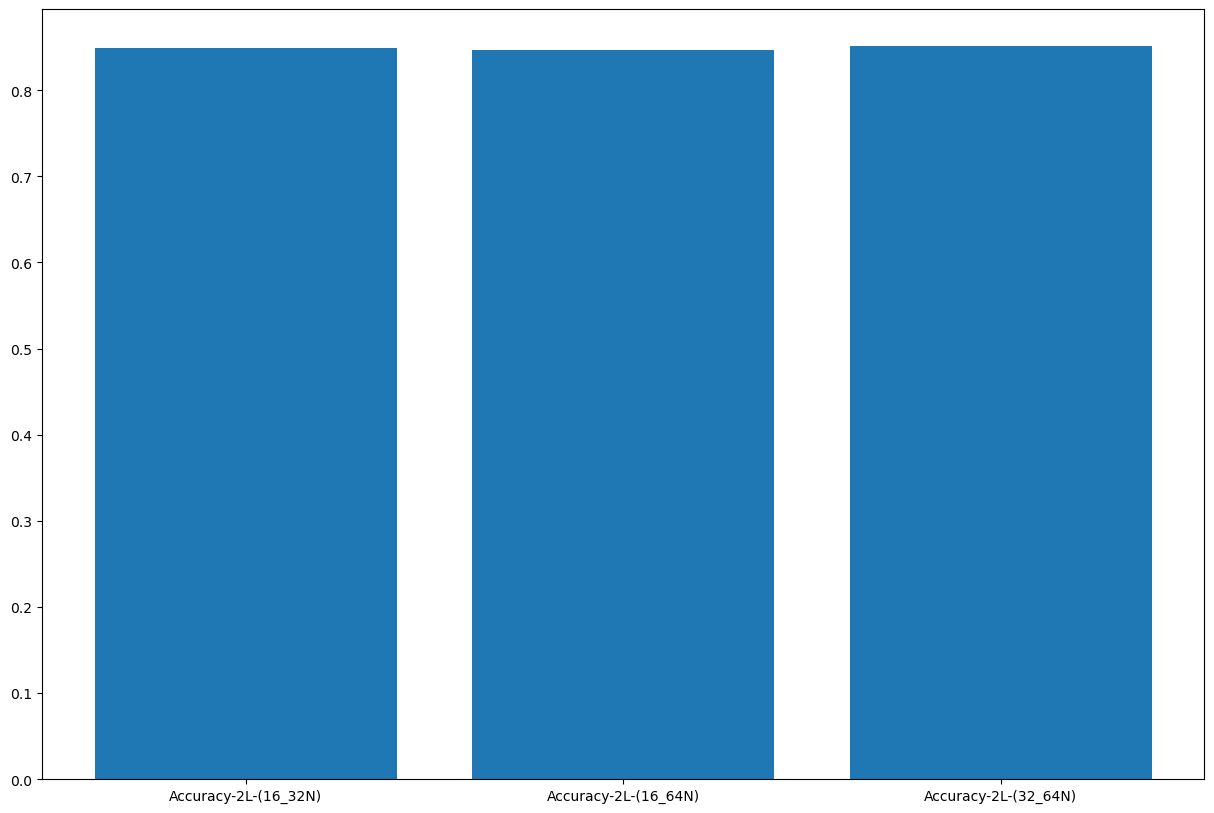

In [83]:
draw_result(x2_acc,y2_acc)

در یک شبکه دو لایه استفاده از 16 و 64 نورون در لایه های شبکه نتیجه بهتری را در صحت و اتلاف به ما میدهد. میبینیم که همزمان که بالاترین اکیورسی را دارد، کمترین اتلاف را از ان خود کرده است.

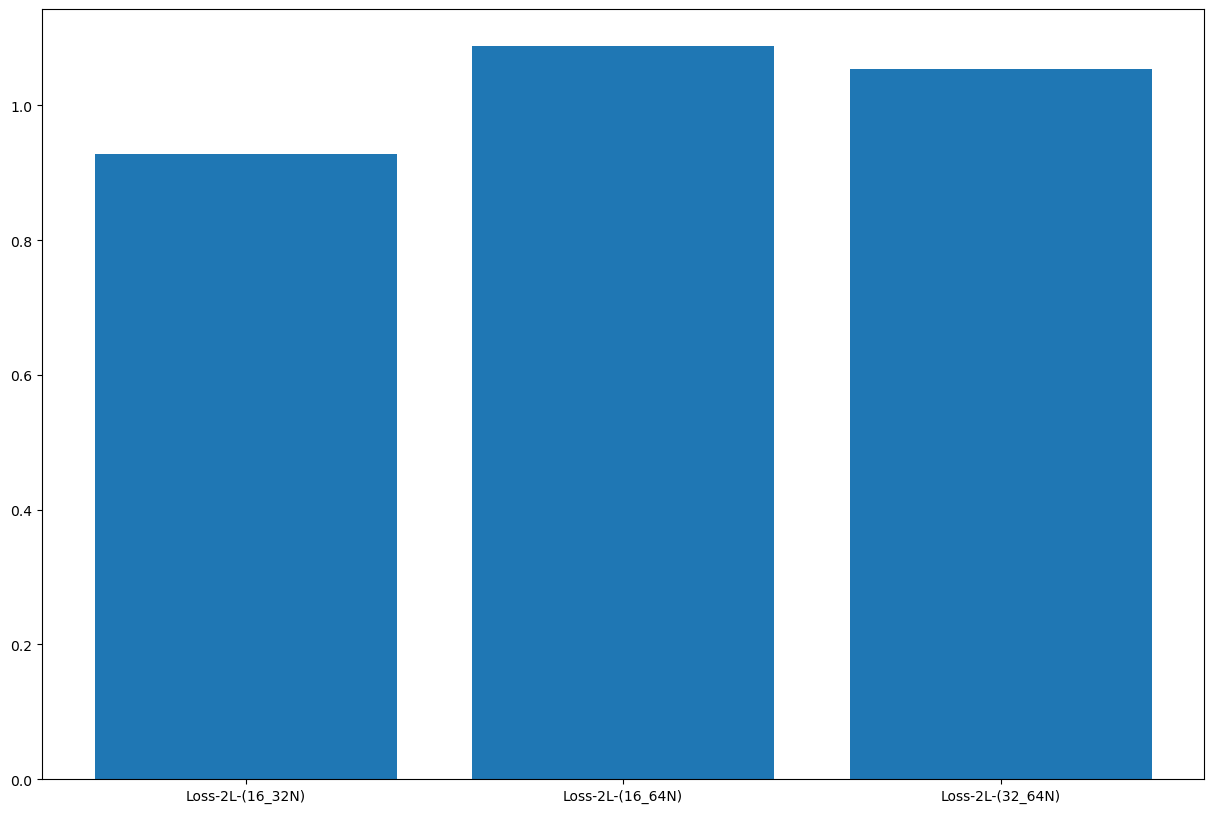

In [84]:
draw_result(x2_loss,y2_loss)

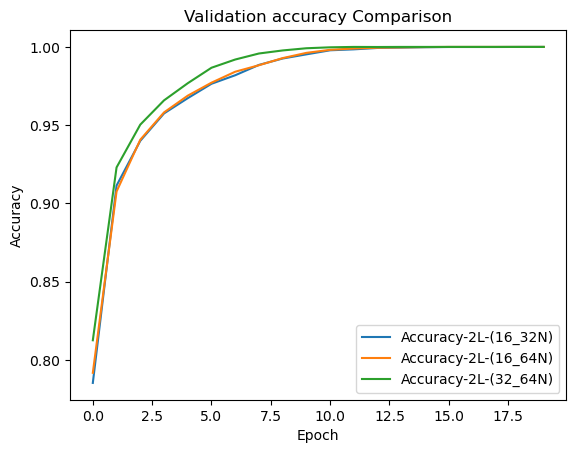

In [85]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])

plt.title('Validation accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(y2_acc, loc='lower right')
plt.show()

معیار صحت برای هر سه خط به یک نتیجه میرسد و می توان از این نظر همه سه نتیجه رو یکسان دانست.

## b) 3 layer

In [86]:
x3_acc=[]
y3_acc=[]

x3_loss=[]
y3_loss=[]

In [87]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])



x3_loss.append(results[0])
y3_loss.append('Loss-3L-(16-32-64N)')

x3_acc.append(results[1])
y3_acc.append('Accuracy-3L-(16-32-64N)')

Epoch 1/20
40/40 - 3s - loss: 0.5116 - accuracy: 0.7935 - val_loss: 0.3121 - val_accuracy: 0.8722 - 3s/epoch - 73ms/step
Epoch 2/20
40/40 - 1s - loss: 0.2292 - accuracy: 0.9131 - val_loss: 0.2884 - val_accuracy: 0.8800 - 591ms/epoch - 15ms/step
Epoch 3/20
40/40 - 1s - loss: 0.1515 - accuracy: 0.9447 - val_loss: 0.3056 - val_accuracy: 0.8772 - 563ms/epoch - 14ms/step
Epoch 4/20
40/40 - 1s - loss: 0.1086 - accuracy: 0.9645 - val_loss: 0.3616 - val_accuracy: 0.8736 - 629ms/epoch - 16ms/step
Epoch 5/20
40/40 - 1s - loss: 0.0816 - accuracy: 0.9743 - val_loss: 0.4258 - val_accuracy: 0.8680 - 549ms/epoch - 14ms/step
Epoch 6/20
40/40 - 1s - loss: 0.0676 - accuracy: 0.9774 - val_loss: 0.5425 - val_accuracy: 0.8586 - 555ms/epoch - 14ms/step
Epoch 7/20
40/40 - 1s - loss: 0.0550 - accuracy: 0.9819 - val_loss: 0.5392 - val_accuracy: 0.8646 - 580ms/epoch - 14ms/step
Epoch 8/20
40/40 - 1s - loss: 0.0343 - accuracy: 0.9920 - val_loss: 0.6038 - val_accuracy: 0.8620 - 598ms/epoch - 15ms/step
Epoch 9/20


In [88]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])



x3_loss.append(results[0])
y3_loss.append('Loss-3L-(64-32-16N)')

x3_acc.append(results[1])
y3_acc.append('Accuracy-3L-(64-32-16N)')

Epoch 1/20
40/40 - 3s - loss: 0.4300 - accuracy: 0.8158 - val_loss: 0.2831 - val_accuracy: 0.8878 - 3s/epoch - 78ms/step
Epoch 2/20
40/40 - 1s - loss: 0.1961 - accuracy: 0.9288 - val_loss: 0.2919 - val_accuracy: 0.8834 - 1s/epoch - 25ms/step
Epoch 3/20
40/40 - 1s - loss: 0.1330 - accuracy: 0.9538 - val_loss: 0.3346 - val_accuracy: 0.8768 - 1s/epoch - 27ms/step
Epoch 4/20
40/40 - 1s - loss: 0.0920 - accuracy: 0.9693 - val_loss: 0.4034 - val_accuracy: 0.8712 - 1s/epoch - 26ms/step
Epoch 5/20
40/40 - 1s - loss: 0.0598 - accuracy: 0.9814 - val_loss: 0.4697 - val_accuracy: 0.8690 - 1s/epoch - 27ms/step
Epoch 6/20
40/40 - 1s - loss: 0.0382 - accuracy: 0.9901 - val_loss: 0.5629 - val_accuracy: 0.8612 - 979ms/epoch - 24ms/step
Epoch 7/20
40/40 - 1s - loss: 0.0222 - accuracy: 0.9958 - val_loss: 0.6269 - val_accuracy: 0.8662 - 1s/epoch - 26ms/step
Epoch 8/20
40/40 - 1s - loss: 0.0098 - accuracy: 0.9990 - val_loss: 0.7263 - val_accuracy: 0.8574 - 1s/epoch - 26ms/step
Epoch 9/20
40/40 - 1s - loss:

In [89]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history3 = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])




x3_loss.append(results[0])
y3_loss.append('Loss-3L-(16-64-32N)')

x3_acc.append(results[1])
y3_acc.append('Accuracy-3L-(16-64-32N)')

Epoch 1/20
40/40 - 3s - loss: 0.5076 - accuracy: 0.7826 - val_loss: 0.3054 - val_accuracy: 0.8760 - 3s/epoch - 66ms/step
Epoch 2/20
40/40 - 1s - loss: 0.2244 - accuracy: 0.9160 - val_loss: 0.2924 - val_accuracy: 0.8794 - 609ms/epoch - 15ms/step
Epoch 3/20
40/40 - 1s - loss: 0.1490 - accuracy: 0.9488 - val_loss: 0.3164 - val_accuracy: 0.8802 - 590ms/epoch - 15ms/step
Epoch 4/20
40/40 - 1s - loss: 0.1092 - accuracy: 0.9643 - val_loss: 0.3780 - val_accuracy: 0.8692 - 576ms/epoch - 14ms/step
Epoch 5/20
40/40 - 1s - loss: 0.0845 - accuracy: 0.9719 - val_loss: 0.4419 - val_accuracy: 0.8668 - 578ms/epoch - 14ms/step
Epoch 6/20
40/40 - 1s - loss: 0.0533 - accuracy: 0.9856 - val_loss: 0.4892 - val_accuracy: 0.8674 - 592ms/epoch - 15ms/step
Epoch 7/20
40/40 - 1s - loss: 0.0306 - accuracy: 0.9940 - val_loss: 0.5669 - val_accuracy: 0.8596 - 556ms/epoch - 14ms/step
Epoch 8/20
40/40 - 1s - loss: 0.0163 - accuracy: 0.9977 - val_loss: 0.6281 - val_accuracy: 0.8608 - 586ms/epoch - 15ms/step
Epoch 9/20


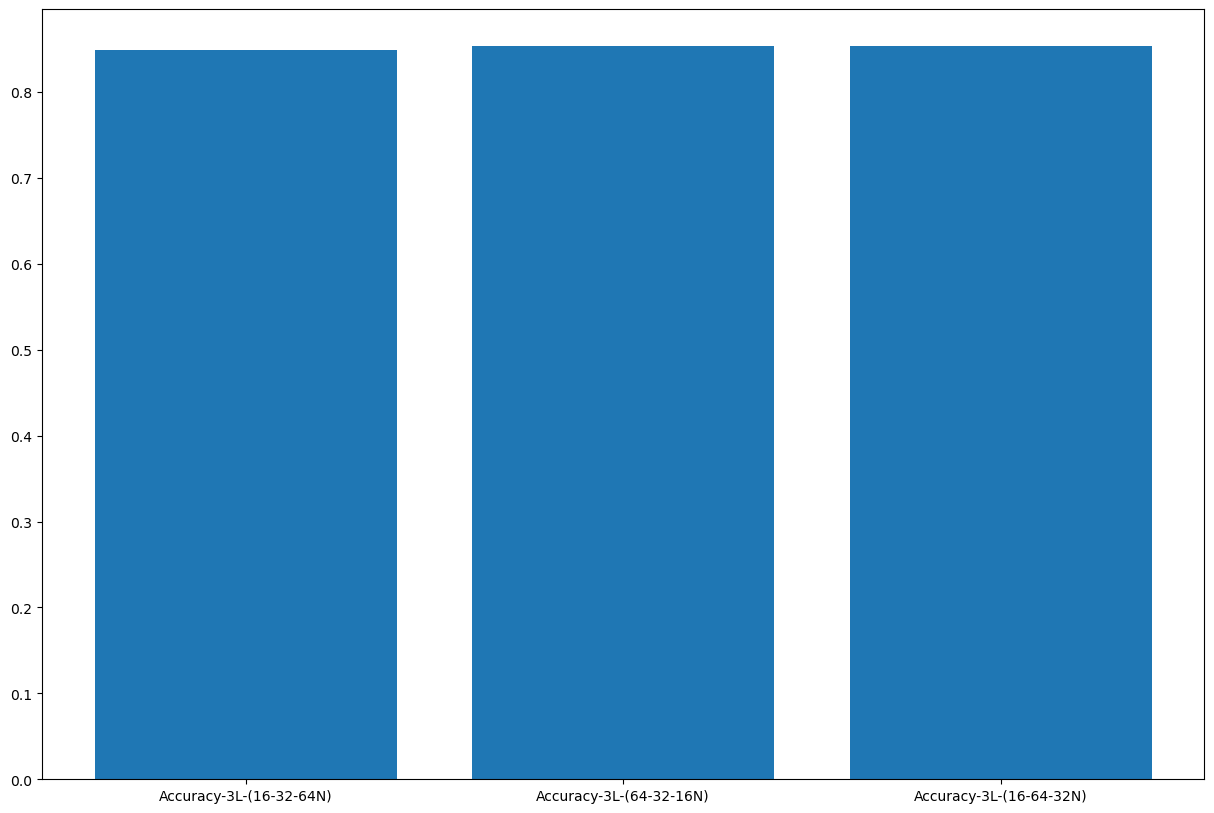

In [90]:
draw_result(x3_acc,y3_acc)

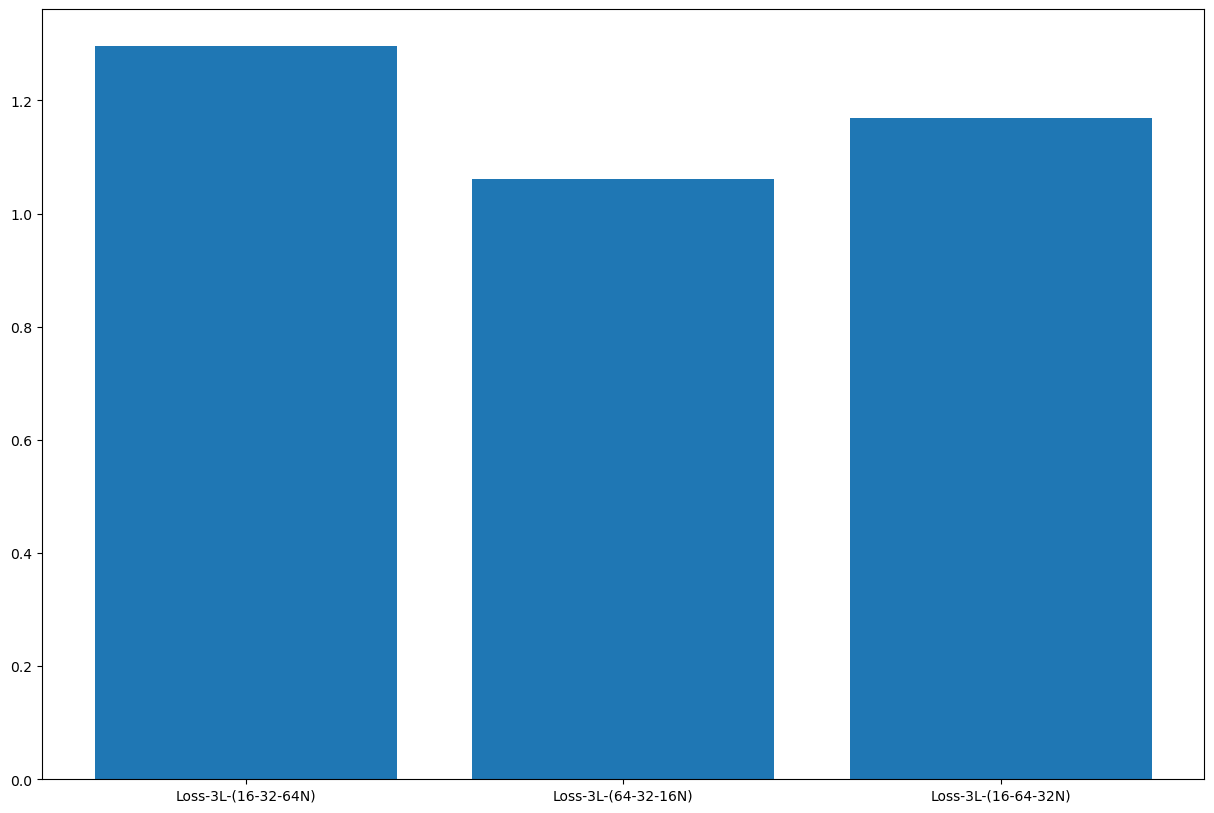

In [91]:
draw_result(x3_loss,y3_loss)

در یک شبکه سه لایه زمانی که به ترتیب از 64 و 32 و 16 نورون در لایه ها استفاده میکنیم بهترین نتیجه را به دست می اوریم. همانطور که مشاهده میکنید در اکیورسی با اختلاف کمی این ترتیب بهترین بوده است ولی با اختلاف چشم گیری کمترین اتلاف را داشته است.

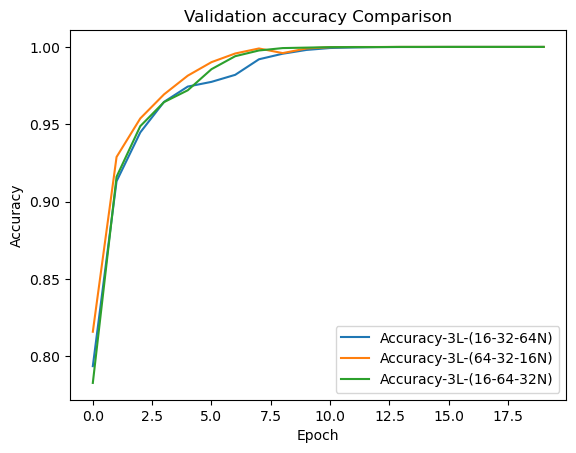

In [94]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])

plt.title('Validation accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(y3_acc, loc='lower right')
plt.show()

روند پیشرفت معیار صحت برای سه حالت را در نمودار بالا مشاهده میکنید.
در نهایت همه به یک نتیجه همگرا میشوند. لذا در زمانی که از شبکه سه لایه استفاده میکنیم تفاوت چندانی ندارد که تعداد نورون های هر لایه به چه صورت باشد.
 اما میانگین در نمودار قبلی جزئیات بیشتری را نمایش میدهد و برتری را به شبکه با تعداد نورون به ترتیب 64-32-16 می دهد.

## c) 1 layer

In [95]:
x1_acc=[]
y1_acc=[]


x1_loss=[]
y1_loss=[]

In [96]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

x1_loss.append(results[0])
y1_loss.append('Loss-1L-CrossEntropy')

x1_acc.append(results[1])
y1_acc.append('Accuracy-1L-CrossEntropy')

Epoch 1/20
40/40 - 2s - loss: 0.5078 - accuracy: 0.7936 - val_loss: 0.3752 - val_accuracy: 0.8622 - 2s/epoch - 52ms/step
Epoch 2/20
40/40 - 0s - loss: 0.2951 - accuracy: 0.9017 - val_loss: 0.3014 - val_accuracy: 0.8858 - 482ms/epoch - 12ms/step
Epoch 3/20
40/40 - 1s - loss: 0.2275 - accuracy: 0.9273 - val_loss: 0.2807 - val_accuracy: 0.8876 - 507ms/epoch - 13ms/step
Epoch 4/20
40/40 - 1s - loss: 0.1895 - accuracy: 0.9395 - val_loss: 0.2763 - val_accuracy: 0.8860 - 601ms/epoch - 15ms/step
Epoch 5/20
40/40 - 1s - loss: 0.1629 - accuracy: 0.9478 - val_loss: 0.2768 - val_accuracy: 0.8860 - 627ms/epoch - 16ms/step
Epoch 6/20
40/40 - 1s - loss: 0.1421 - accuracy: 0.9560 - val_loss: 0.2824 - val_accuracy: 0.8844 - 624ms/epoch - 16ms/step
Epoch 7/20
40/40 - 1s - loss: 0.1263 - accuracy: 0.9626 - val_loss: 0.2923 - val_accuracy: 0.8848 - 621ms/epoch - 16ms/step
Epoch 8/20
40/40 - 1s - loss: 0.1126 - accuracy: 0.9675 - val_loss: 0.3022 - val_accuracy: 0.8810 - 619ms/epoch - 15ms/step
Epoch 9/20


In [97]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

history2 = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

x1_loss.append(results[0])
y1_loss.append('Loss-1L-MSE')

x1_acc.append(results[1])
y1_acc.append('Accuracy-1L-MSE')

Epoch 1/20
40/40 - 2s - loss: 0.1881 - accuracy: 0.7648 - val_loss: 0.1301 - val_accuracy: 0.8630 - 2s/epoch - 49ms/step
Epoch 2/20
40/40 - 1s - loss: 0.0982 - accuracy: 0.9034 - val_loss: 0.0970 - val_accuracy: 0.8842 - 634ms/epoch - 16ms/step
Epoch 3/20
40/40 - 1s - loss: 0.0706 - accuracy: 0.9282 - val_loss: 0.0874 - val_accuracy: 0.8864 - 618ms/epoch - 15ms/step
Epoch 4/20
40/40 - 1s - loss: 0.0570 - accuracy: 0.9421 - val_loss: 0.0846 - val_accuracy: 0.8860 - 607ms/epoch - 15ms/step
Epoch 5/20
40/40 - 1s - loss: 0.0480 - accuracy: 0.9530 - val_loss: 0.0841 - val_accuracy: 0.8818 - 614ms/epoch - 15ms/step
Epoch 6/20
40/40 - 1s - loss: 0.0415 - accuracy: 0.9607 - val_loss: 0.0848 - val_accuracy: 0.8788 - 602ms/epoch - 15ms/step
Epoch 7/20
40/40 - 1s - loss: 0.0359 - accuracy: 0.9677 - val_loss: 0.0851 - val_accuracy: 0.8778 - 607ms/epoch - 15ms/step
Epoch 8/20
40/40 - 1s - loss: 0.0317 - accuracy: 0.9725 - val_loss: 0.0869 - val_accuracy: 0.8760 - 619ms/epoch - 15ms/step
Epoch 9/20


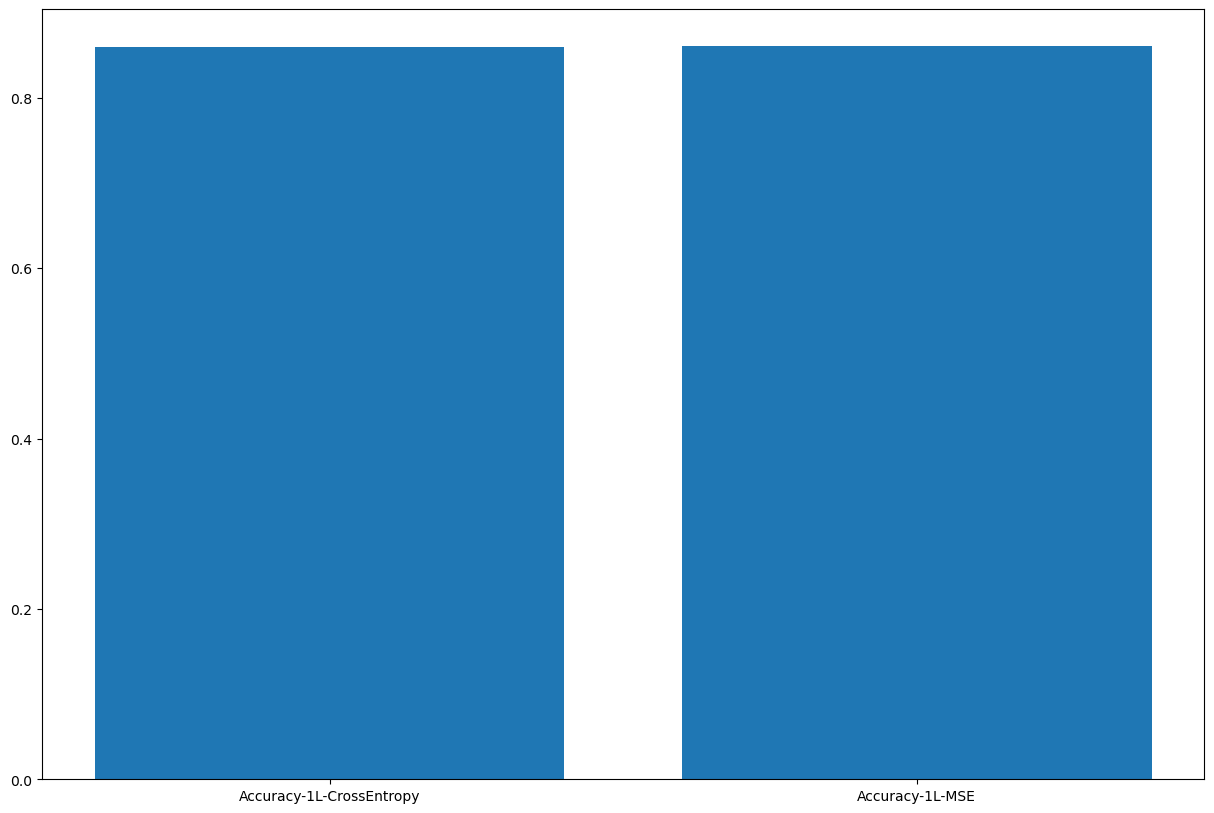

In [98]:
draw_result(x1_acc,y1_acc)

استفاده از تابع ام اس ئی نتیجه بهتری را نشان میدهد چرا که برای معیار صحت که تفاوت چندانی وجود ندارد اما این برتری را در تابع اتلاف مشاهده میکنیم که اتلاف این تابع لاس به شدت چشم گیر است.

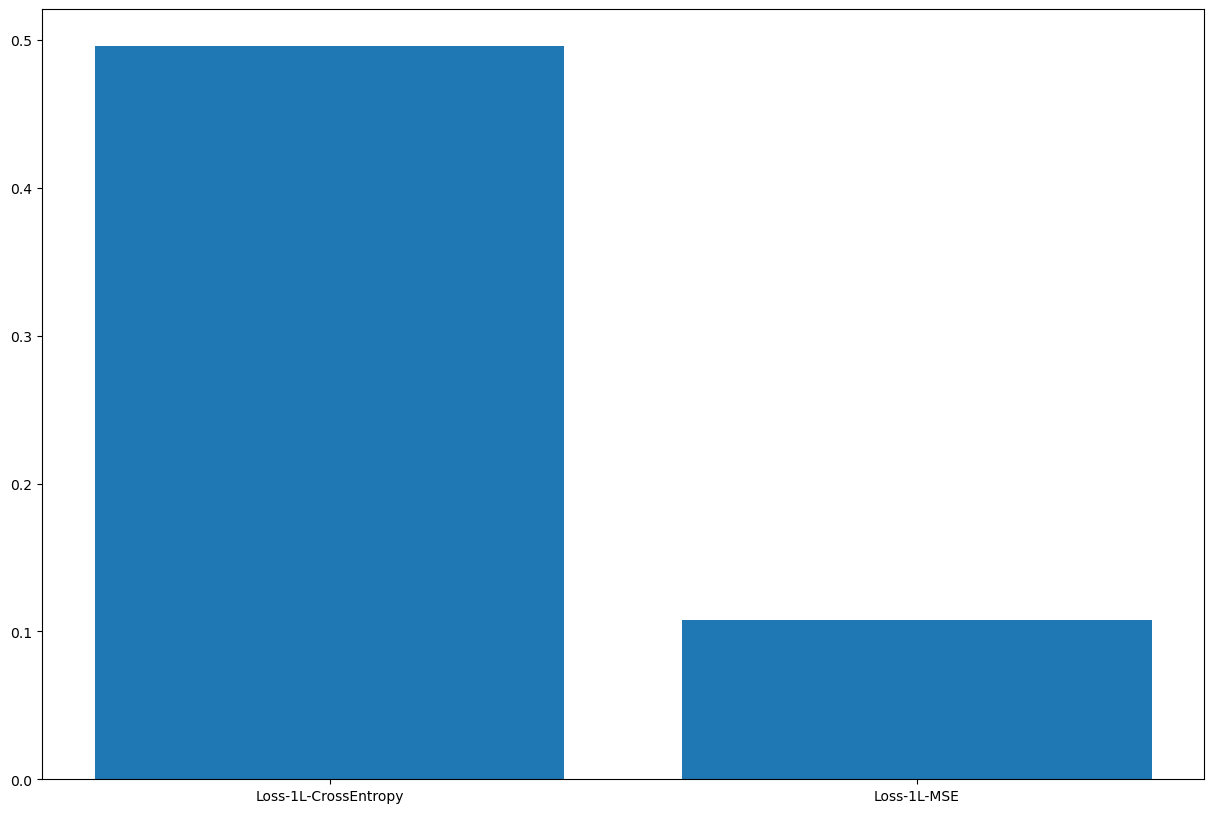

In [99]:
draw_result(x1_loss,y1_loss)

## c) 2 layer

In [102]:
x2_acc=[]
y2_acc=[]

x2_loss=[]
y2_loss=[]

In [103]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

x2_loss.append(results[0])
y2_loss.append('Loss-2L-CrossEntropy')

x2_acc.append(results[1])
y2_acc.append('Accuracy-2L-CrossEntropy')

Epoch 1/20
40/40 - 2s - loss: 0.5232 - accuracy: 0.7750 - val_loss: 0.3501 - val_accuracy: 0.8724 - 2s/epoch - 59ms/step
Epoch 2/20
40/40 - 1s - loss: 0.2605 - accuracy: 0.9093 - val_loss: 0.2760 - val_accuracy: 0.8888 - 647ms/epoch - 16ms/step
Epoch 3/20
40/40 - 1s - loss: 0.1775 - accuracy: 0.9391 - val_loss: 0.2799 - val_accuracy: 0.8868 - 628ms/epoch - 16ms/step
Epoch 4/20
40/40 - 1s - loss: 0.1337 - accuracy: 0.9560 - val_loss: 0.3168 - val_accuracy: 0.8760 - 672ms/epoch - 17ms/step
Epoch 5/20
40/40 - 1s - loss: 0.1028 - accuracy: 0.9690 - val_loss: 0.3266 - val_accuracy: 0.8796 - 643ms/epoch - 16ms/step
Epoch 6/20
40/40 - 1s - loss: 0.0785 - accuracy: 0.9789 - val_loss: 0.3644 - val_accuracy: 0.8738 - 653ms/epoch - 16ms/step
Epoch 7/20
40/40 - 1s - loss: 0.0602 - accuracy: 0.9854 - val_loss: 0.4055 - val_accuracy: 0.8706 - 640ms/epoch - 16ms/step
Epoch 8/20
40/40 - 1s - loss: 0.0470 - accuracy: 0.9905 - val_loss: 0.4339 - val_accuracy: 0.8656 - 655ms/epoch - 16ms/step
Epoch 9/20


In [104]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])


x2_loss.append(results[0])
y2_loss.append('Loss-2L-MSE')

x2_acc.append(results[1])
y2_acc.append('Accuracy-2L-MSE')

Epoch 1/20
40/40 - 2s - loss: 0.1781 - accuracy: 0.7897 - val_loss: 0.1145 - val_accuracy: 0.8696 - 2s/epoch - 42ms/step
Epoch 2/20
40/40 - 1s - loss: 0.0830 - accuracy: 0.9086 - val_loss: 0.0865 - val_accuracy: 0.8860 - 564ms/epoch - 14ms/step
Epoch 3/20
40/40 - 1s - loss: 0.0574 - accuracy: 0.9352 - val_loss: 0.0831 - val_accuracy: 0.8850 - 534ms/epoch - 13ms/step
Epoch 4/20
40/40 - 1s - loss: 0.0436 - accuracy: 0.9536 - val_loss: 0.0838 - val_accuracy: 0.8838 - 526ms/epoch - 13ms/step
Epoch 5/20
40/40 - 1s - loss: 0.0346 - accuracy: 0.9656 - val_loss: 0.0873 - val_accuracy: 0.8790 - 532ms/epoch - 13ms/step
Epoch 6/20
40/40 - 1s - loss: 0.0280 - accuracy: 0.9744 - val_loss: 0.0895 - val_accuracy: 0.8742 - 584ms/epoch - 15ms/step
Epoch 7/20
40/40 - 1s - loss: 0.0234 - accuracy: 0.9791 - val_loss: 0.0925 - val_accuracy: 0.8754 - 669ms/epoch - 17ms/step
Epoch 8/20
40/40 - 1s - loss: 0.0192 - accuracy: 0.9844 - val_loss: 0.0948 - val_accuracy: 0.8750 - 644ms/epoch - 16ms/step
Epoch 9/20


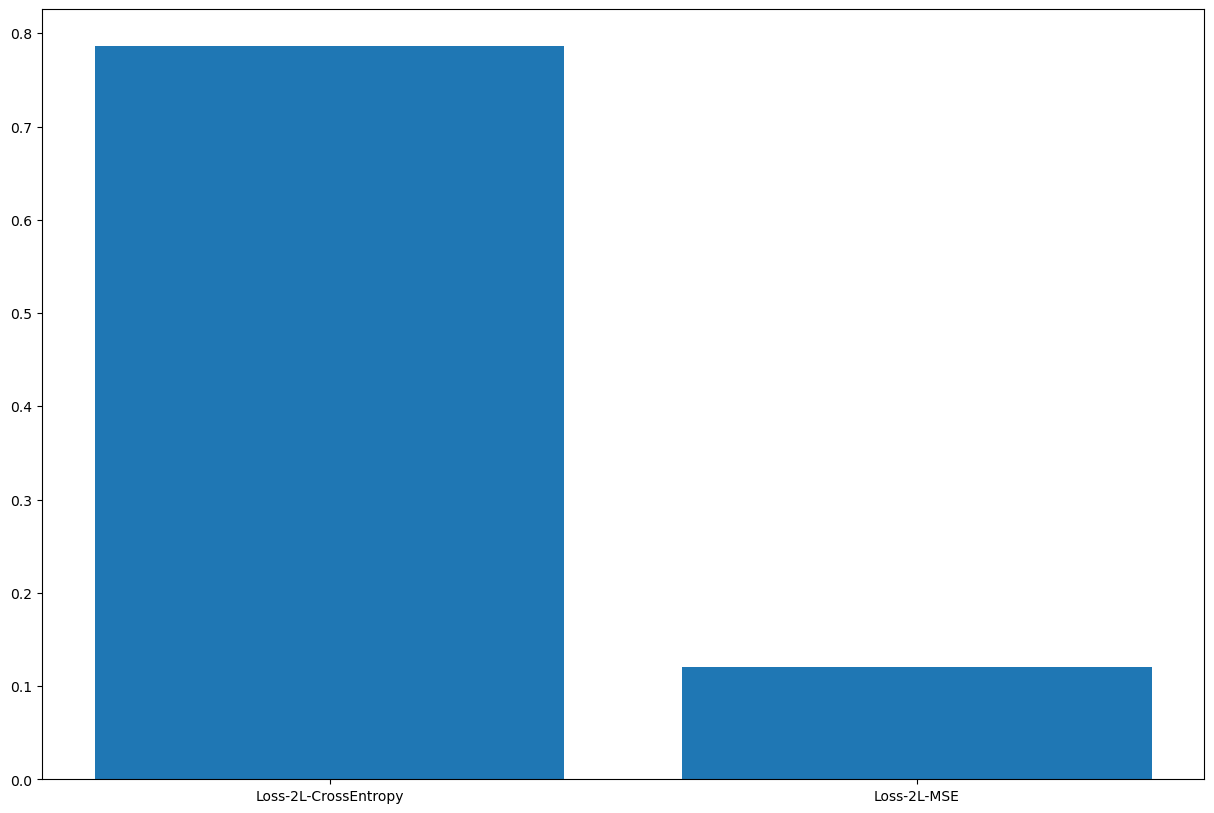

In [105]:
draw_result(x2_loss,y2_loss)

استفاده از تابع ام اس ئی نتیجه بهتری را نشان میدهد چرا که برای معیار صحت که تفاوت چندانی وجود ندارد اما این برتری را در تابع اتلاف مشاهده میکنیم که اتلاف این تابع لاس به شدت چشم گیر است.

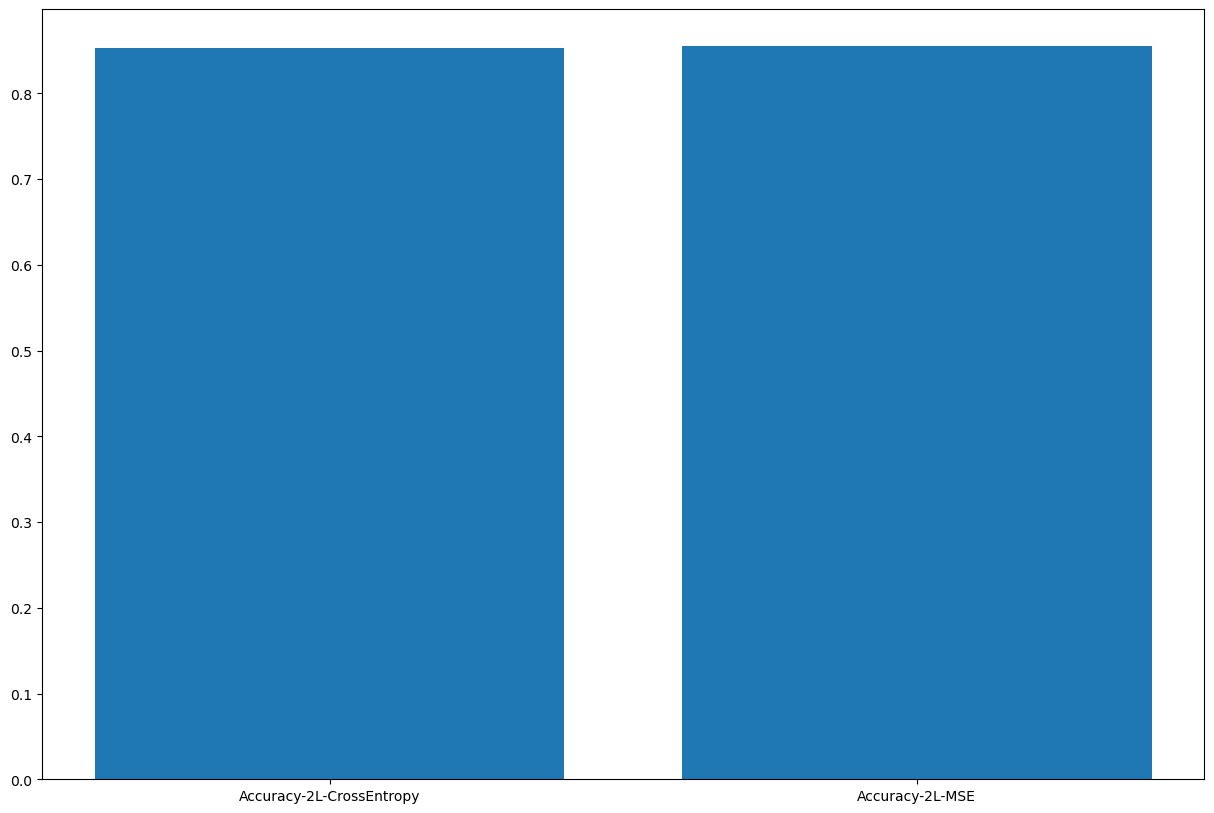

In [106]:
draw_result(x2_acc,y2_acc)

## c) 3 layer

In [107]:
x3_acc=[]
y3_acc=[]

x3_loss=[]
y3_loss=[]

In [108]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])


x3_loss.append(results[0])
y3_loss.append('Loss-3L-CrossEntropy')

x3_acc.append(results[1])
y3_acc.append('Accuracy-3L-CrossEntropy')

Epoch 1/20
40/40 - 3s - loss: 0.5403 - accuracy: 0.7912 - val_loss: 0.3577 - val_accuracy: 0.8694 - 3s/epoch - 69ms/step
Epoch 2/20
40/40 - 1s - loss: 0.2639 - accuracy: 0.9080 - val_loss: 0.2753 - val_accuracy: 0.8894 - 677ms/epoch - 17ms/step
Epoch 3/20
40/40 - 1s - loss: 0.1792 - accuracy: 0.9370 - val_loss: 0.2987 - val_accuracy: 0.8810 - 662ms/epoch - 17ms/step
Epoch 4/20
40/40 - 1s - loss: 0.1387 - accuracy: 0.9524 - val_loss: 0.3018 - val_accuracy: 0.8830 - 655ms/epoch - 16ms/step
Epoch 5/20
40/40 - 1s - loss: 0.1072 - accuracy: 0.9657 - val_loss: 0.3305 - val_accuracy: 0.8784 - 677ms/epoch - 17ms/step
Epoch 6/20
40/40 - 1s - loss: 0.0830 - accuracy: 0.9753 - val_loss: 0.3706 - val_accuracy: 0.8762 - 669ms/epoch - 17ms/step
Epoch 7/20
40/40 - 1s - loss: 0.0649 - accuracy: 0.9825 - val_loss: 0.4123 - val_accuracy: 0.8714 - 662ms/epoch - 17ms/step
Epoch 8/20
40/40 - 1s - loss: 0.0486 - accuracy: 0.9891 - val_loss: 0.4631 - val_accuracy: 0.8696 - 666ms/epoch - 17ms/step
Epoch 9/20


In [109]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

x3_loss.append(results[0])
y3_loss.append('Loss-3L-MSE')

x3_acc.append(results[1])
y3_acc.append('Accuracy-3L-MSE')

Epoch 1/20
40/40 - 5s - loss: 0.1863 - accuracy: 0.7829 - val_loss: 0.1123 - val_accuracy: 0.8726 - 5s/epoch - 137ms/step
Epoch 2/20
40/40 - 1s - loss: 0.0795 - accuracy: 0.9096 - val_loss: 0.0852 - val_accuracy: 0.8850 - 669ms/epoch - 17ms/step
Epoch 3/20
40/40 - 1s - loss: 0.0518 - accuracy: 0.9413 - val_loss: 0.0829 - val_accuracy: 0.8864 - 724ms/epoch - 18ms/step
Epoch 4/20
40/40 - 1s - loss: 0.0385 - accuracy: 0.9579 - val_loss: 0.0854 - val_accuracy: 0.8810 - 758ms/epoch - 19ms/step
Epoch 5/20
40/40 - 1s - loss: 0.0302 - accuracy: 0.9702 - val_loss: 0.0895 - val_accuracy: 0.8770 - 724ms/epoch - 18ms/step
Epoch 6/20
40/40 - 1s - loss: 0.0235 - accuracy: 0.9772 - val_loss: 0.0938 - val_accuracy: 0.8762 - 679ms/epoch - 17ms/step
Epoch 7/20
40/40 - 1s - loss: 0.0190 - accuracy: 0.9834 - val_loss: 0.0963 - val_accuracy: 0.8722 - 710ms/epoch - 18ms/step
Epoch 8/20
40/40 - 1s - loss: 0.0143 - accuracy: 0.9883 - val_loss: 0.0981 - val_accuracy: 0.8732 - 714ms/epoch - 18ms/step
Epoch 9/20

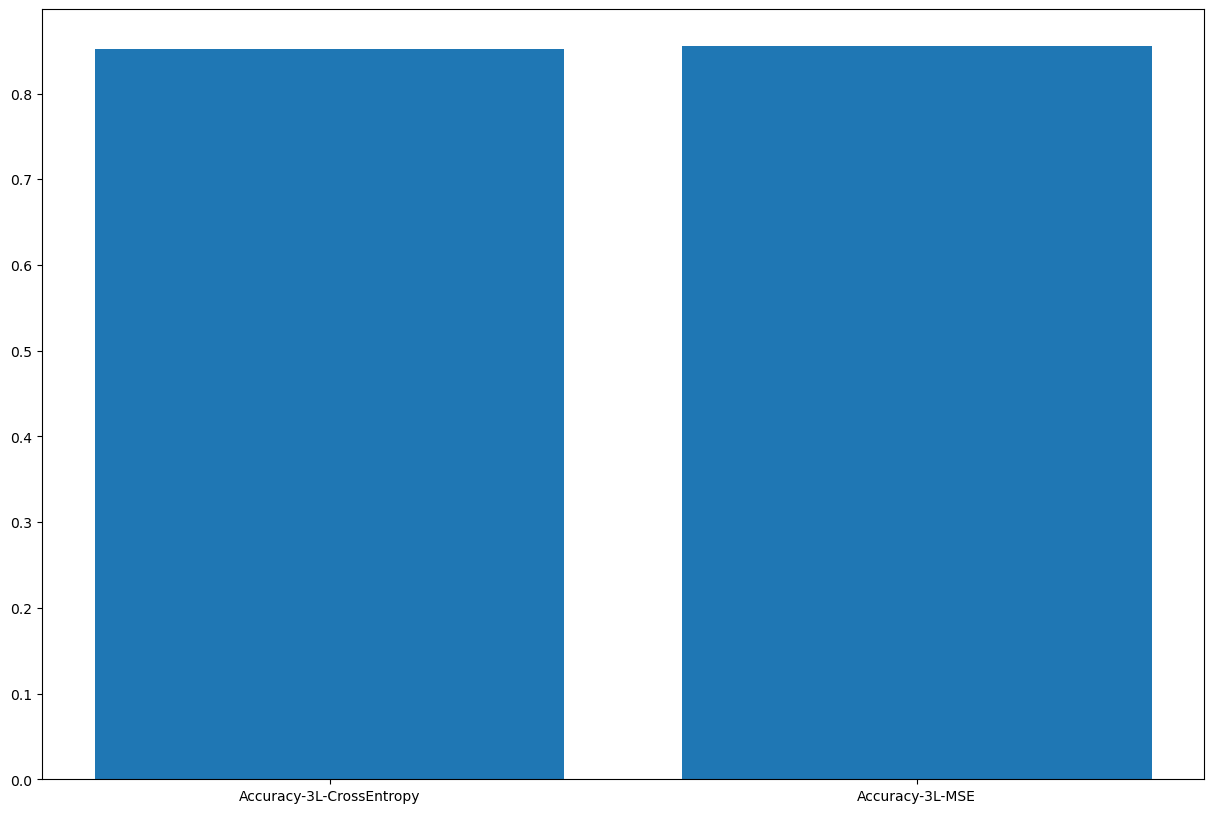

In [110]:
draw_result(x3_acc,y3_acc)

استفاده از تابع ام اس ئی نتیجه بهتری را نشان میدهد چرا که برای معیار صحت که تفاوت چندانی وجود ندارد اما این برتری را در تابع اتلاف مشاهده میکنیم که اتلاف این تابع لاس به شدت چشم گیر است.

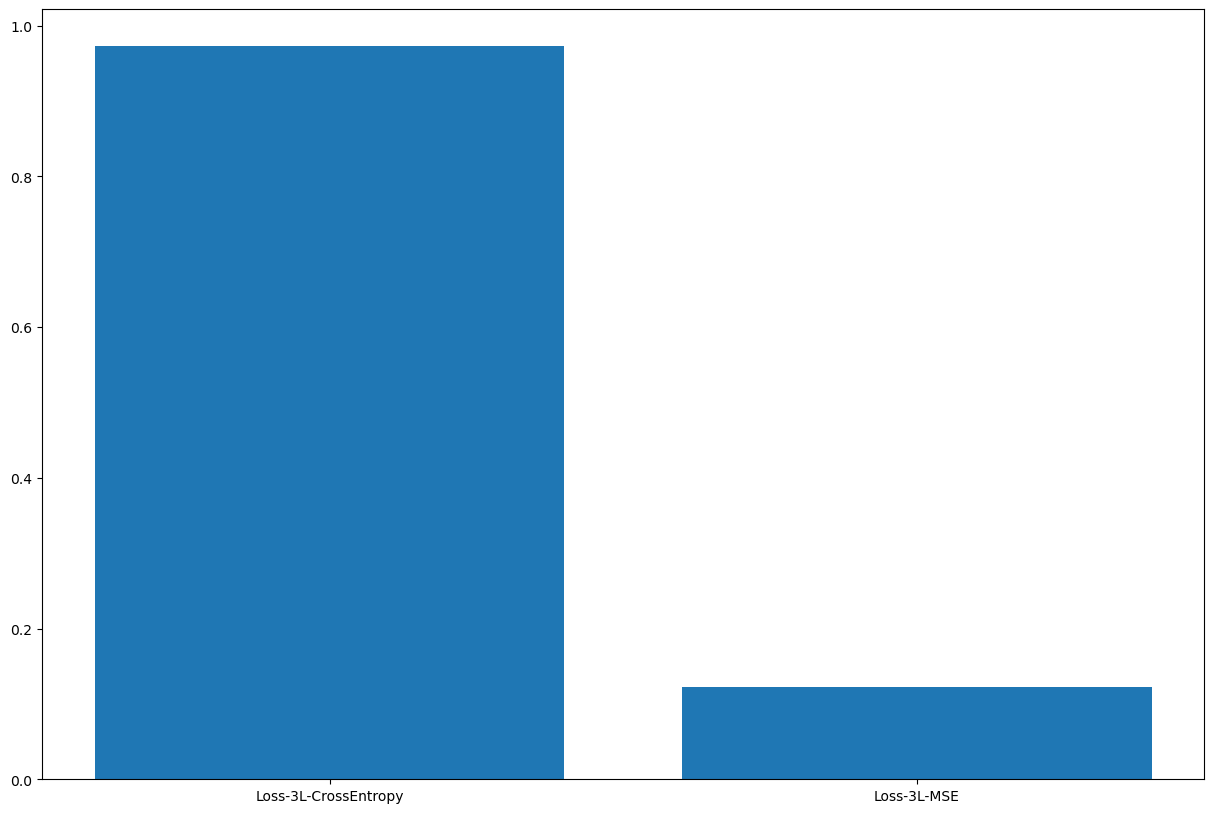

In [111]:
draw_result(x3_loss,y3_loss)

### به طور کلی استفاده از تابع ام اس ئی به مراتب بهتر از تابع کراس اینتروپی می باشد.

## d) 1 layer

In [127]:
xacc=[]
yacc=[]
xloss=[]
yloss=[]

In [128]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

xacc.append(results[0])
yacc.append('Acc-1L-ReLU')

xloss.append(results[1])
yloss.append('Loss-1L-ReLU')

Epoch 1/20
40/40 - 1s - loss: 0.5040 - accuracy: 0.7983 - val_loss: 0.3707 - val_accuracy: 0.8670 - 1s/epoch - 32ms/step
Epoch 2/20
40/40 - 0s - loss: 0.2969 - accuracy: 0.8999 - val_loss: 0.3052 - val_accuracy: 0.8830 - 460ms/epoch - 11ms/step
Epoch 3/20
40/40 - 0s - loss: 0.2303 - accuracy: 0.9251 - val_loss: 0.2840 - val_accuracy: 0.8882 - 463ms/epoch - 12ms/step
Epoch 4/20
40/40 - 0s - loss: 0.1927 - accuracy: 0.9380 - val_loss: 0.2775 - val_accuracy: 0.8848 - 458ms/epoch - 11ms/step
Epoch 5/20
40/40 - 0s - loss: 0.1652 - accuracy: 0.9488 - val_loss: 0.2771 - val_accuracy: 0.8844 - 478ms/epoch - 12ms/step
Epoch 6/20
40/40 - 0s - loss: 0.1452 - accuracy: 0.9545 - val_loss: 0.2824 - val_accuracy: 0.8830 - 469ms/epoch - 12ms/step
Epoch 7/20
40/40 - 0s - loss: 0.1279 - accuracy: 0.9607 - val_loss: 0.2888 - val_accuracy: 0.8818 - 447ms/epoch - 11ms/step
Epoch 8/20
40/40 - 0s - loss: 0.1143 - accuracy: 0.9670 - val_loss: 0.3028 - val_accuracy: 0.8804 - 470ms/epoch - 12ms/step
Epoch 9/20


In [129]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='tanh', input_shape=(10000,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])


xacc.append(results[0])
yacc.append('Acc-1L-Tanh')

xloss.append(results[1])
yloss.append('Loss-1L-Tanh')

Epoch 1/20
40/40 - 1s - loss: 0.4864 - accuracy: 0.8053 - val_loss: 0.3683 - val_accuracy: 0.8650 - 1s/epoch - 31ms/step
Epoch 2/20
40/40 - 0s - loss: 0.2959 - accuracy: 0.9022 - val_loss: 0.3047 - val_accuracy: 0.8826 - 453ms/epoch - 11ms/step
Epoch 3/20
40/40 - 0s - loss: 0.2306 - accuracy: 0.9263 - val_loss: 0.2834 - val_accuracy: 0.8842 - 456ms/epoch - 11ms/step
Epoch 4/20
40/40 - 0s - loss: 0.1918 - accuracy: 0.9390 - val_loss: 0.2750 - val_accuracy: 0.8862 - 458ms/epoch - 11ms/step
Epoch 5/20
40/40 - 0s - loss: 0.1639 - accuracy: 0.9494 - val_loss: 0.2735 - val_accuracy: 0.8840 - 448ms/epoch - 11ms/step
Epoch 6/20
40/40 - 0s - loss: 0.1437 - accuracy: 0.9577 - val_loss: 0.2787 - val_accuracy: 0.8836 - 443ms/epoch - 11ms/step
Epoch 7/20
40/40 - 0s - loss: 0.1263 - accuracy: 0.9642 - val_loss: 0.2858 - val_accuracy: 0.8830 - 446ms/epoch - 11ms/step
Epoch 8/20
40/40 - 0s - loss: 0.1119 - accuracy: 0.9694 - val_loss: 0.3005 - val_accuracy: 0.8796 - 453ms/epoch - 11ms/step
Epoch 9/20


In [130]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='sigmoid', input_shape=(10000,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history3 = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])


xacc.append(results[0])
yacc.append('Acc-1L-sigmoid')

xloss.append(results[1])
yloss.append('Loss-1L-sigmoid')

Epoch 1/20
40/40 - 1s - loss: 0.6138 - accuracy: 0.7613 - val_loss: 0.5428 - val_accuracy: 0.8298 - 1s/epoch - 33ms/step
Epoch 2/20
40/40 - 0s - loss: 0.4841 - accuracy: 0.8612 - val_loss: 0.4561 - val_accuracy: 0.8532 - 463ms/epoch - 12ms/step
Epoch 3/20
40/40 - 0s - loss: 0.4037 - accuracy: 0.8845 - val_loss: 0.3979 - val_accuracy: 0.8666 - 466ms/epoch - 12ms/step
Epoch 4/20
40/40 - 0s - loss: 0.3466 - accuracy: 0.9000 - val_loss: 0.3584 - val_accuracy: 0.8756 - 462ms/epoch - 12ms/step
Epoch 5/20
40/40 - 0s - loss: 0.3036 - accuracy: 0.9133 - val_loss: 0.3304 - val_accuracy: 0.8814 - 444ms/epoch - 11ms/step
Epoch 6/20
40/40 - 0s - loss: 0.2710 - accuracy: 0.9218 - val_loss: 0.3110 - val_accuracy: 0.8848 - 463ms/epoch - 12ms/step
Epoch 7/20
40/40 - 0s - loss: 0.2452 - accuracy: 0.9294 - val_loss: 0.2975 - val_accuracy: 0.8858 - 449ms/epoch - 11ms/step
Epoch 8/20
40/40 - 0s - loss: 0.2242 - accuracy: 0.9358 - val_loss: 0.2885 - val_accuracy: 0.8858 - 450ms/epoch - 11ms/step
Epoch 9/20


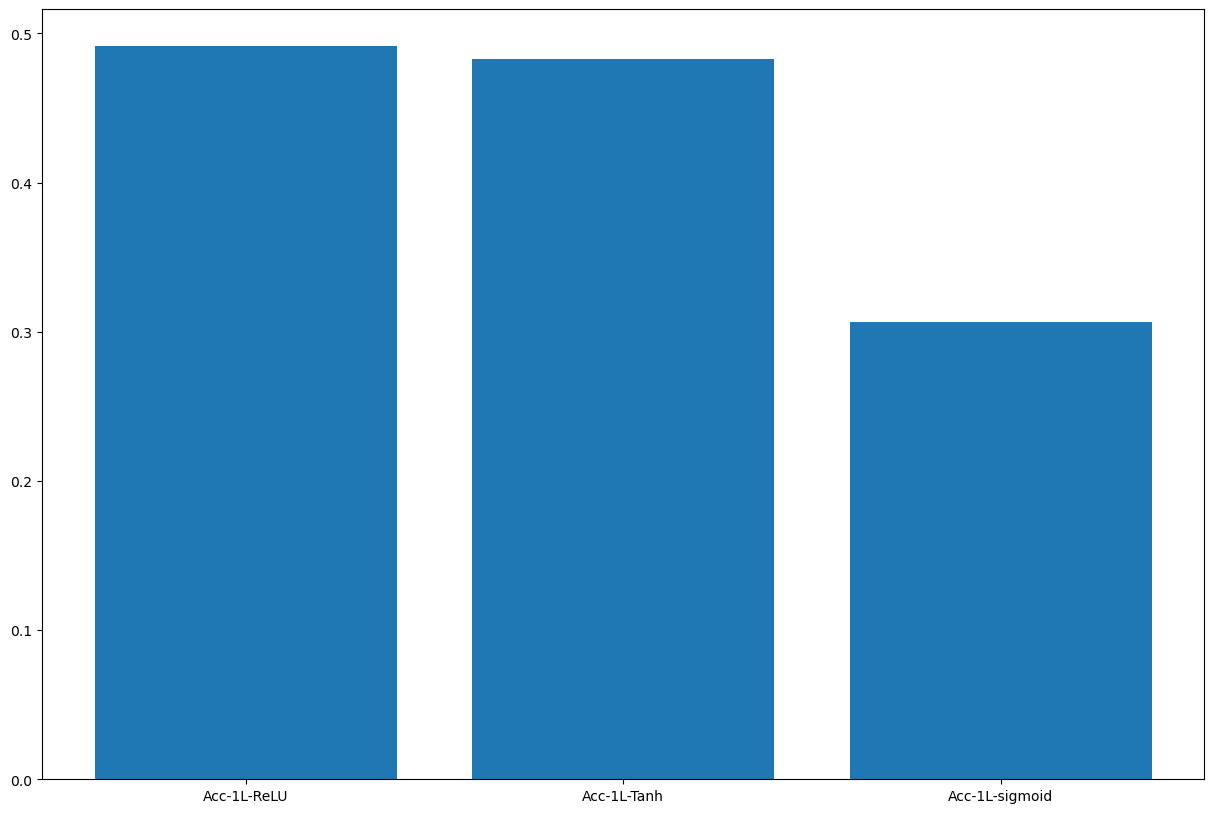

In [131]:
draw_result(xacc,yacc)

در یک شبکه تک لایه استفاده از توابع مختلف نتایج بالا را داده است. همانطور که میبینیم تابع سیگموید با اختلاف اتلاف کمتری را دارد و در عین حال صحت بالاتری را نسبت به سایر توابع دارد.

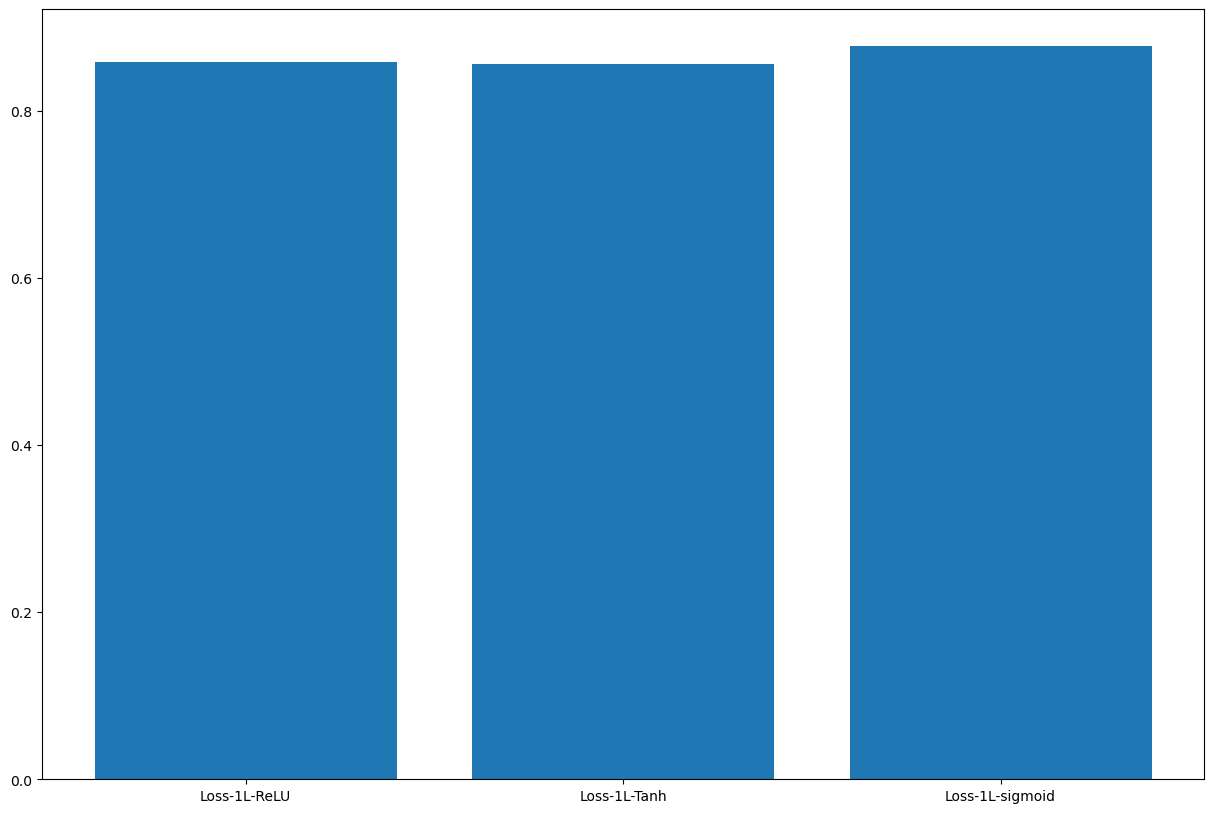

In [132]:
draw_result(xloss,yloss)

## d) 2 layer

In [135]:
xacc=[]
yacc=[]
xloss=[]
yloss=[]

In [136]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])



xacc.append(results[0])
yacc.append('Loss-2L-(ReLU-Tanh)')

xloss.append(results[1])
yloss.append('Acc-2L-(ReLU-Tanh)')

Epoch 1/20
40/40 - 1s - loss: 0.5144 - accuracy: 0.7948 - val_loss: 0.3608 - val_accuracy: 0.8686 - 1s/epoch - 34ms/step
Epoch 2/20
40/40 - 1s - loss: 0.2689 - accuracy: 0.9102 - val_loss: 0.2786 - val_accuracy: 0.8872 - 506ms/epoch - 13ms/step
Epoch 3/20
40/40 - 0s - loss: 0.1875 - accuracy: 0.9376 - val_loss: 0.2766 - val_accuracy: 0.8864 - 463ms/epoch - 12ms/step
Epoch 4/20
40/40 - 0s - loss: 0.1441 - accuracy: 0.9548 - val_loss: 0.2828 - val_accuracy: 0.8834 - 476ms/epoch - 12ms/step
Epoch 5/20
40/40 - 0s - loss: 0.1118 - accuracy: 0.9678 - val_loss: 0.3255 - val_accuracy: 0.8708 - 463ms/epoch - 12ms/step
Epoch 6/20
40/40 - 0s - loss: 0.0934 - accuracy: 0.9739 - val_loss: 0.3330 - val_accuracy: 0.8758 - 458ms/epoch - 11ms/step
Epoch 7/20
40/40 - 0s - loss: 0.0738 - accuracy: 0.9823 - val_loss: 0.3587 - val_accuracy: 0.8730 - 448ms/epoch - 11ms/step
Epoch 8/20
40/40 - 0s - loss: 0.0559 - accuracy: 0.9887 - val_loss: 0.3853 - val_accuracy: 0.8696 - 469ms/epoch - 12ms/step
Epoch 9/20


In [137]:
model = Sequential()
model.add(Dense(16, activation='tanh', input_shape=(10000,)))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])



xacc.append(results[0])
yacc.append('Loss-2L-(Tanh-Sigmoid)')

xloss.append(results[1])
yloss.append('Acc-2L-(Tanh-Sigmoid)')

Epoch 1/20
40/40 - 1s - loss: 0.6180 - accuracy: 0.7190 - val_loss: 0.5162 - val_accuracy: 0.8332 - 1s/epoch - 34ms/step
Epoch 2/20
40/40 - 0s - loss: 0.4265 - accuracy: 0.8813 - val_loss: 0.3773 - val_accuracy: 0.8758 - 479ms/epoch - 12ms/step
Epoch 3/20
40/40 - 1s - loss: 0.3057 - accuracy: 0.9164 - val_loss: 0.3135 - val_accuracy: 0.8874 - 539ms/epoch - 13ms/step
Epoch 4/20
40/40 - 1s - loss: 0.2373 - accuracy: 0.9331 - val_loss: 0.2875 - val_accuracy: 0.8866 - 515ms/epoch - 13ms/step
Epoch 5/20
40/40 - 0s - loss: 0.1931 - accuracy: 0.9469 - val_loss: 0.2791 - val_accuracy: 0.8852 - 493ms/epoch - 12ms/step
Epoch 6/20
40/40 - 0s - loss: 0.1608 - accuracy: 0.9574 - val_loss: 0.2802 - val_accuracy: 0.8878 - 484ms/epoch - 12ms/step
Epoch 7/20
40/40 - 0s - loss: 0.1373 - accuracy: 0.9663 - val_loss: 0.2864 - val_accuracy: 0.8800 - 488ms/epoch - 12ms/step
Epoch 8/20
40/40 - 0s - loss: 0.1167 - accuracy: 0.9735 - val_loss: 0.2983 - val_accuracy: 0.8762 - 478ms/epoch - 12ms/step
Epoch 9/20


In [138]:
model = Sequential()
model.add(Dense(16, activation='tanh', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history3 = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])


xacc.append(results[0])
yacc.append('Loss-2L-(Tanh-ReLU)')

xloss.append(results[1])
yloss.append('Acc-2L-(Tanh-ReLU)')

Epoch 1/20
40/40 - 1s - loss: 0.5387 - accuracy: 0.7666 - val_loss: 0.4151 - val_accuracy: 0.8672 - 1s/epoch - 35ms/step
Epoch 2/20
40/40 - 0s - loss: 0.3191 - accuracy: 0.9058 - val_loss: 0.3167 - val_accuracy: 0.8814 - 483ms/epoch - 12ms/step
Epoch 3/20
40/40 - 0s - loss: 0.2226 - accuracy: 0.9337 - val_loss: 0.2955 - val_accuracy: 0.8802 - 475ms/epoch - 12ms/step
Epoch 4/20
40/40 - 1s - loss: 0.1688 - accuracy: 0.9512 - val_loss: 0.2816 - val_accuracy: 0.8858 - 526ms/epoch - 13ms/step
Epoch 5/20
40/40 - 1s - loss: 0.1327 - accuracy: 0.9625 - val_loss: 0.3126 - val_accuracy: 0.8788 - 526ms/epoch - 13ms/step
Epoch 6/20
40/40 - 0s - loss: 0.1050 - accuracy: 0.9723 - val_loss: 0.3239 - val_accuracy: 0.8790 - 472ms/epoch - 12ms/step
Epoch 7/20
40/40 - 0s - loss: 0.0818 - accuracy: 0.9819 - val_loss: 0.3539 - val_accuracy: 0.8766 - 492ms/epoch - 12ms/step
Epoch 8/20
40/40 - 1s - loss: 0.0660 - accuracy: 0.9862 - val_loss: 0.3801 - val_accuracy: 0.8722 - 504ms/epoch - 13ms/step
Epoch 9/20


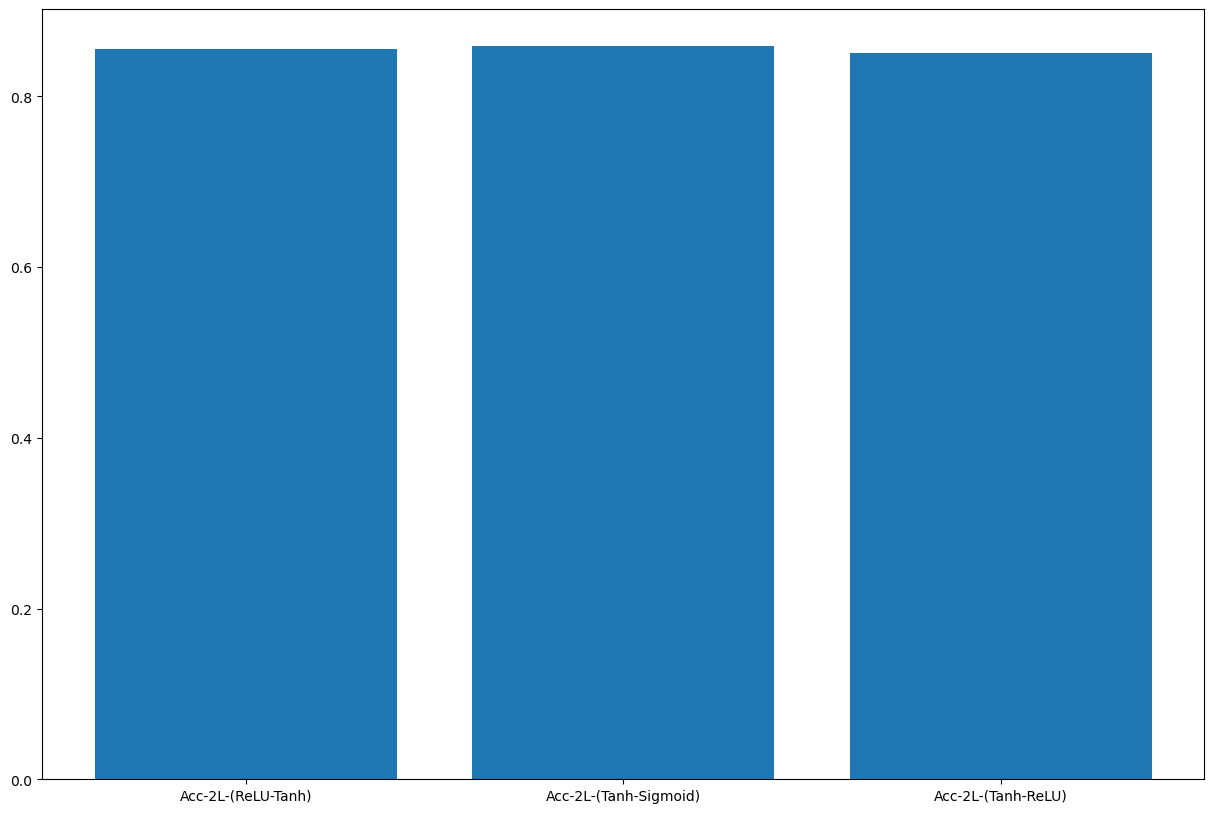

In [139]:
draw_result(xloss,yloss)

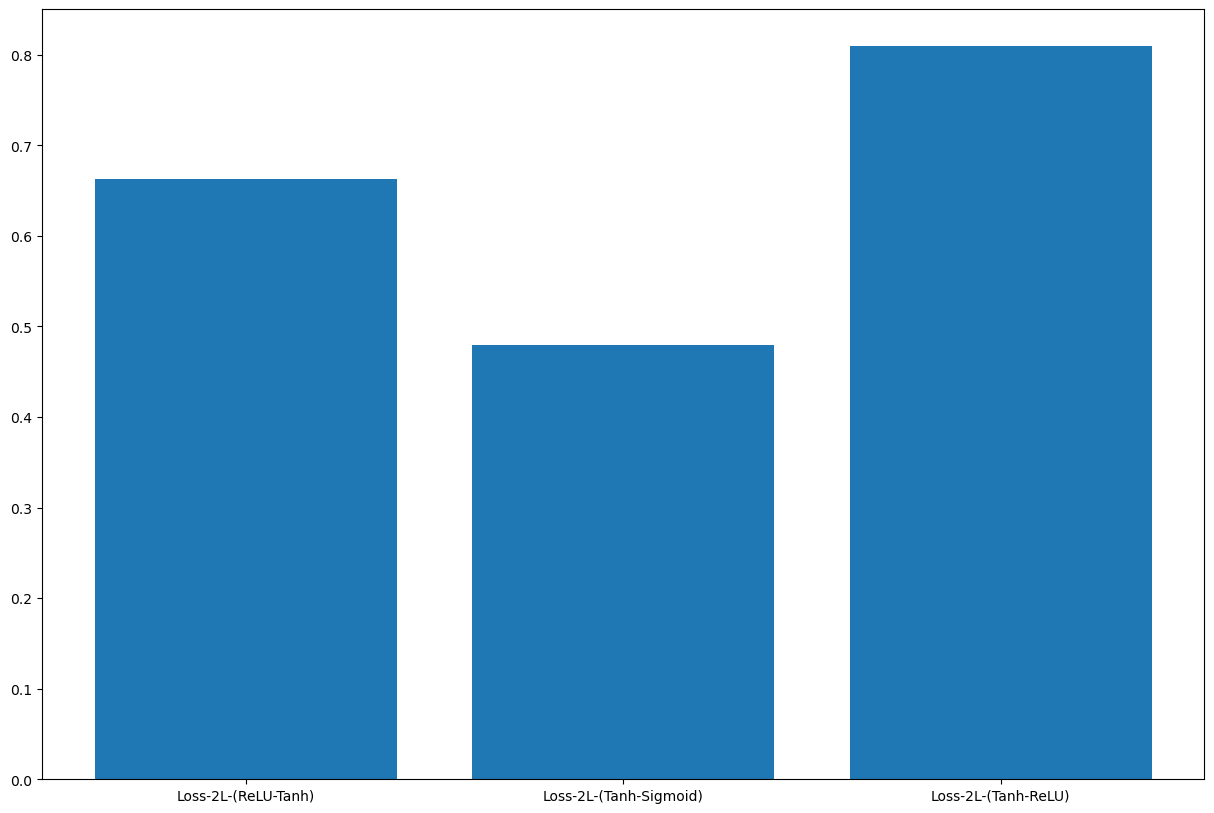

In [140]:
draw_result(xacc,yacc)

استفاده از ترتیب دوم در یک شبکه دو لایه بهتر می باشد. تابع تانژانت و سیگموید اتلاف کمتری را داشته است . این ترکیب صحت بالاتری را از دسته بندی ارائه کرده است. لذا بهتر از سایر ترکیب ها می باشد.

## d) 3 layer

In [149]:
xacc=[]
yacc=[]
xloss=[]
yloss=[]

In [150]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='tanh'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])


xacc.append(results[0])
yacc.append('Loss-(ReLU-Tanh-ReLU)')

xloss.append(results[1])
yloss.append('Acc-(ReLU-Tanh-ReLU)')

Epoch 1/20
40/40 - 2s - loss: 0.5452 - accuracy: 0.7473 - val_loss: 0.4136 - val_accuracy: 0.8728 - 2s/epoch - 39ms/step
Epoch 2/20
40/40 - 0s - loss: 0.3064 - accuracy: 0.9140 - val_loss: 0.3080 - val_accuracy: 0.8838 - 440ms/epoch - 11ms/step
Epoch 3/20
40/40 - 0s - loss: 0.1929 - accuracy: 0.9456 - val_loss: 0.2868 - val_accuracy: 0.8864 - 432ms/epoch - 11ms/step
Epoch 4/20
40/40 - 0s - loss: 0.1339 - accuracy: 0.9637 - val_loss: 0.3166 - val_accuracy: 0.8750 - 438ms/epoch - 11ms/step
Epoch 5/20
40/40 - 0s - loss: 0.0975 - accuracy: 0.9762 - val_loss: 0.3386 - val_accuracy: 0.8738 - 445ms/epoch - 11ms/step
Epoch 6/20
40/40 - 0s - loss: 0.0703 - accuracy: 0.9849 - val_loss: 0.3802 - val_accuracy: 0.8724 - 430ms/epoch - 11ms/step
Epoch 7/20
40/40 - 0s - loss: 0.0537 - accuracy: 0.9899 - val_loss: 0.4245 - val_accuracy: 0.8670 - 439ms/epoch - 11ms/step
Epoch 8/20
40/40 - 0s - loss: 0.0387 - accuracy: 0.9941 - val_loss: 0.4582 - val_accuracy: 0.8662 - 439ms/epoch - 11ms/step
Epoch 9/20


In [151]:
model = Sequential()
model.add(Dense(16, activation='tanh', input_shape=(10000,)))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', results[0])
print('Test accuracy:', results[1])


xacc.append(results[0])
yacc.append('Loss-(Tanh-Sigmoid-ReLU)')

xloss.append(results[1])
yloss.append('Acc-(Tanh-Sigmoid-ReLU)')

Epoch 1/20
40/40 - 2s - loss: 0.5925 - accuracy: 0.7825 - val_loss: 0.4726 - val_accuracy: 0.8524 - 2s/epoch - 39ms/step
Epoch 2/20
40/40 - 0s - loss: 0.3572 - accuracy: 0.8934 - val_loss: 0.3109 - val_accuracy: 0.8810 - 451ms/epoch - 11ms/step
Epoch 3/20
40/40 - 0s - loss: 0.2243 - accuracy: 0.9287 - val_loss: 0.2814 - val_accuracy: 0.8840 - 439ms/epoch - 11ms/step
Epoch 4/20
40/40 - 0s - loss: 0.1645 - accuracy: 0.9484 - val_loss: 0.2775 - val_accuracy: 0.8866 - 442ms/epoch - 11ms/step
Epoch 5/20
40/40 - 0s - loss: 0.1265 - accuracy: 0.9627 - val_loss: 0.2989 - val_accuracy: 0.8808 - 442ms/epoch - 11ms/step
Epoch 6/20
40/40 - 0s - loss: 0.1001 - accuracy: 0.9733 - val_loss: 0.3262 - val_accuracy: 0.8786 - 499ms/epoch - 12ms/step
Epoch 7/20
40/40 - 0s - loss: 0.0810 - accuracy: 0.9813 - val_loss: 0.3525 - val_accuracy: 0.8758 - 430ms/epoch - 11ms/step
Epoch 8/20
40/40 - 0s - loss: 0.0654 - accuracy: 0.9868 - val_loss: 0.3814 - val_accuracy: 0.8734 - 436ms/epoch - 11ms/step
Epoch 9/20


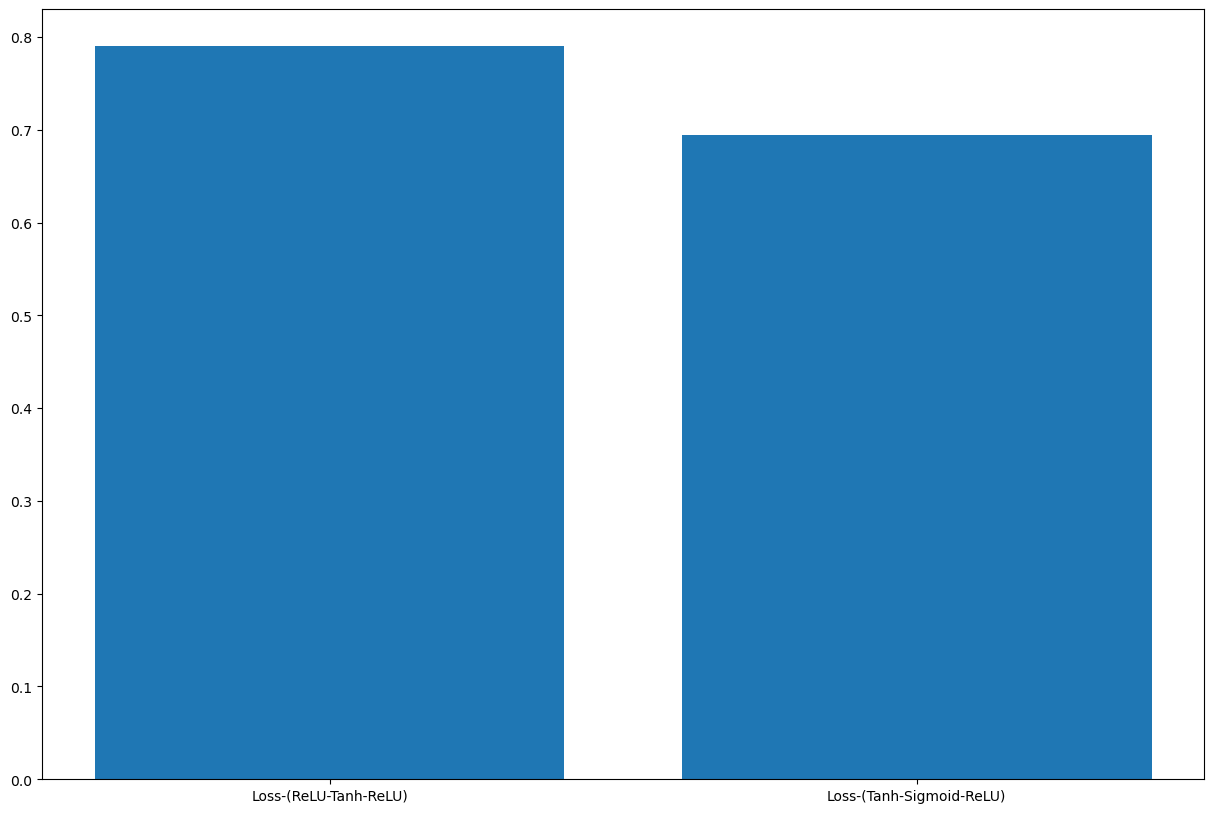

In [152]:
draw_result(xacc,yacc)

معیار صحت در هر دو ترتیب تقریبا نزدیک به هم است. اما نباید از تابع اتلاف غافل شویم. تابع اتلاف در دومین ترتیب نتیجه بهتری را داشته است. لذا استفاده از ترتیب دوم بهتر می باشد.

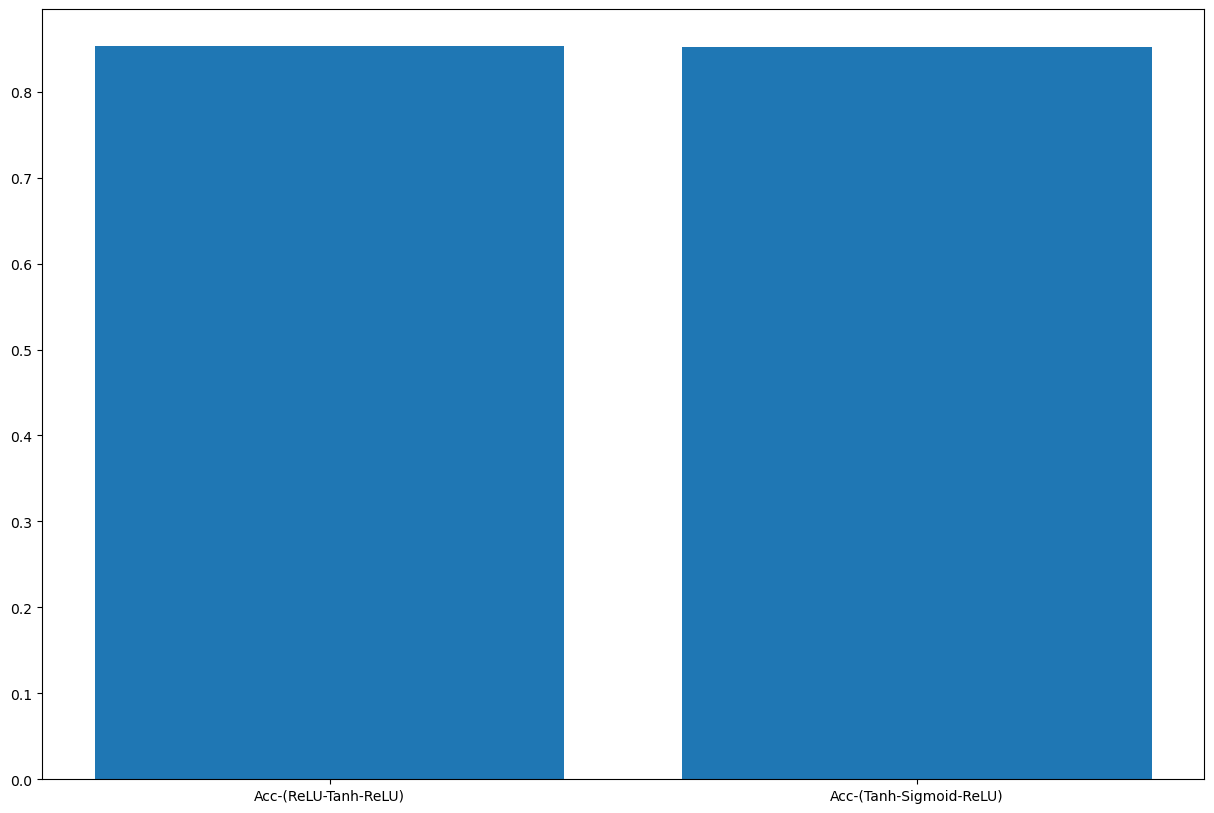

In [153]:
draw_result(xloss,yloss)

### Question 3 is in next jupyter file.